In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<center>
<img src="https://github.com/randall-romero/EC4301/blob/master/Laboratorios/Tema02-Ecuaciones/escuela-de-economia.png?raw=1" width="260" height="85">
</center>
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Estudiantes:  </b><br>
    <b>David Gerardo Mora Salazar (B75115), Manfred Ramírez Alfaro (B76137), Esteban Huang Zheng (B73852) </b>
<br><br>
<b>Tarea 5</b>
<div style="font-size:150%;color:white; background-color: #0064b0;">Profesor: Randall Romero Aguilar, PhD
</div>
<div style="font-size:150%;color:white; background-color: #0064b0;">Fecha límite de entrega: viernes 18 de junio de 2021, 6pm</div> 
</center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bccr import SW
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.formula.api import ols
from scipy.stats import t as t_Student
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

np.random.seed(2021)

## Pregunta 1


## Pregunta 2


## Pregunta 3
(5 puntos) ¿Qué es una regresión espuria? Explique.

Una regresión espuria es una regresión que encuentra significancia estadística para la relación entre variables que son independientes entre sí. El caso más común es entre variables independientes no estacionarias.

## Pregunta 4

Obtenga la serie 25482 del servicio web del BCCR, la cual corresponde al índice de precios al consumidor.
Para todos los incisos de esta pregunta, trabaje con el logaritmo de esta serie.

In [3]:
plt.style.use('seaborn')
IPC = SW(IPC=25482)
SW.quien(25482)
log_IPC = np.log(IPC)
log_IPC= pd.DataFrame(log_IPC)
log_IPC.columns = ["log_IPC"]

Variable 25482 >>>
   Nombre      : Índice de precios al consumidor (junio 2015=100).
   Descripcion : Indice de Precios al Consumidor (IPC), (Julio 2006 = 100).
   Unidad      : Nivel.
   Periodicidad: Mensual.

|--- Índices de Precios
|------ Índice de precios al consumidor (junio 2015=100) [25482]'




(a) (4 puntos ) Haga un gráfico de la serie. ¿Parece estacionaria? Explique su respuesta.

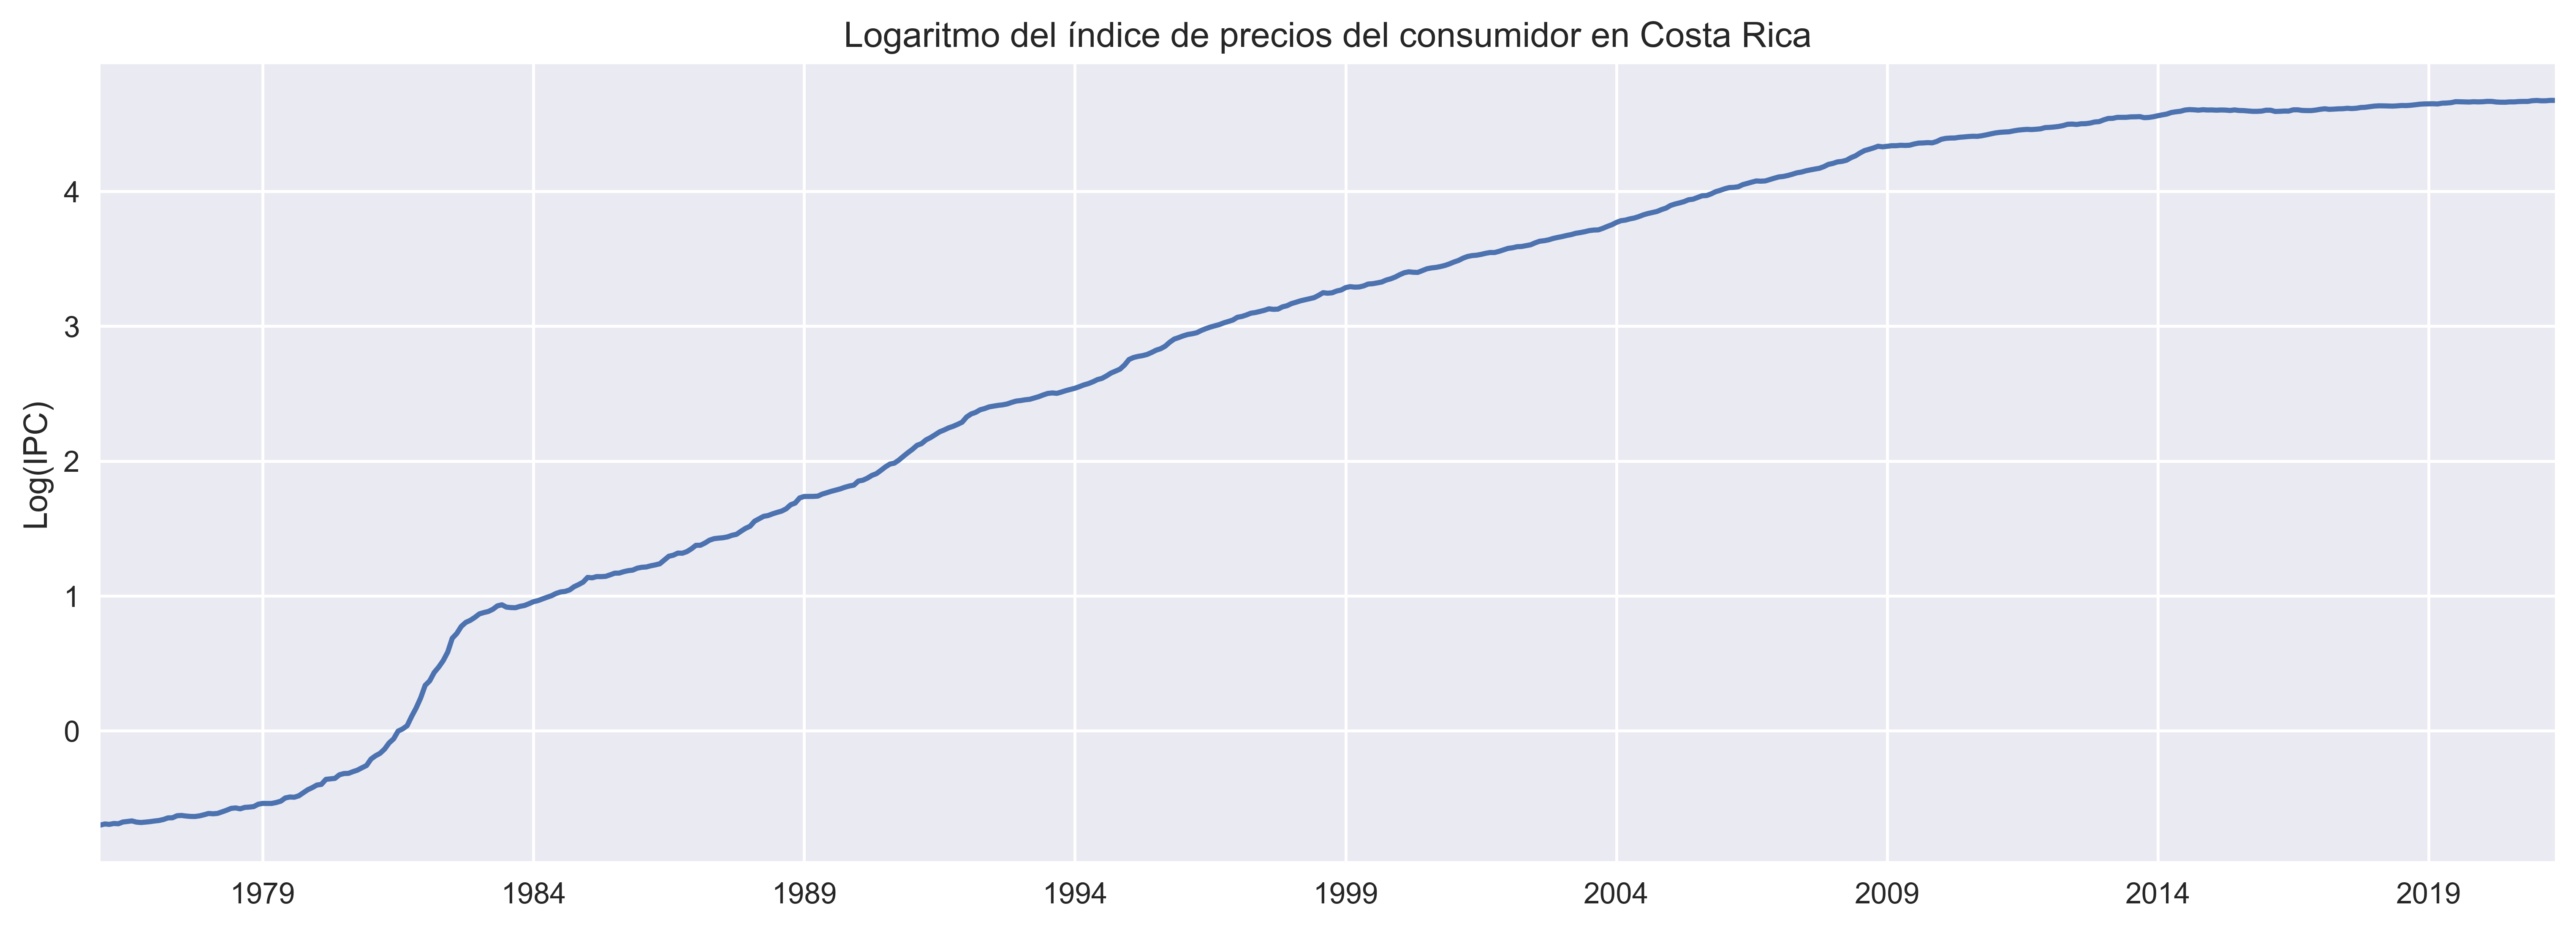

In [4]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(15,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel="", ylabel=y)
    
figura(log_IPC,"Logaritmo del índice de precios del consumidor en Costa Rica", "Log(IPC)")

La serie no parece estacionaria. Esta crece en el tiempo, lo cual implica que la media no es constante en el tiempo.

(b) (4 puntos ) Obtenga el autocorrelograma de la serie. ¿Parece estacionaria? Explique su respuesta.

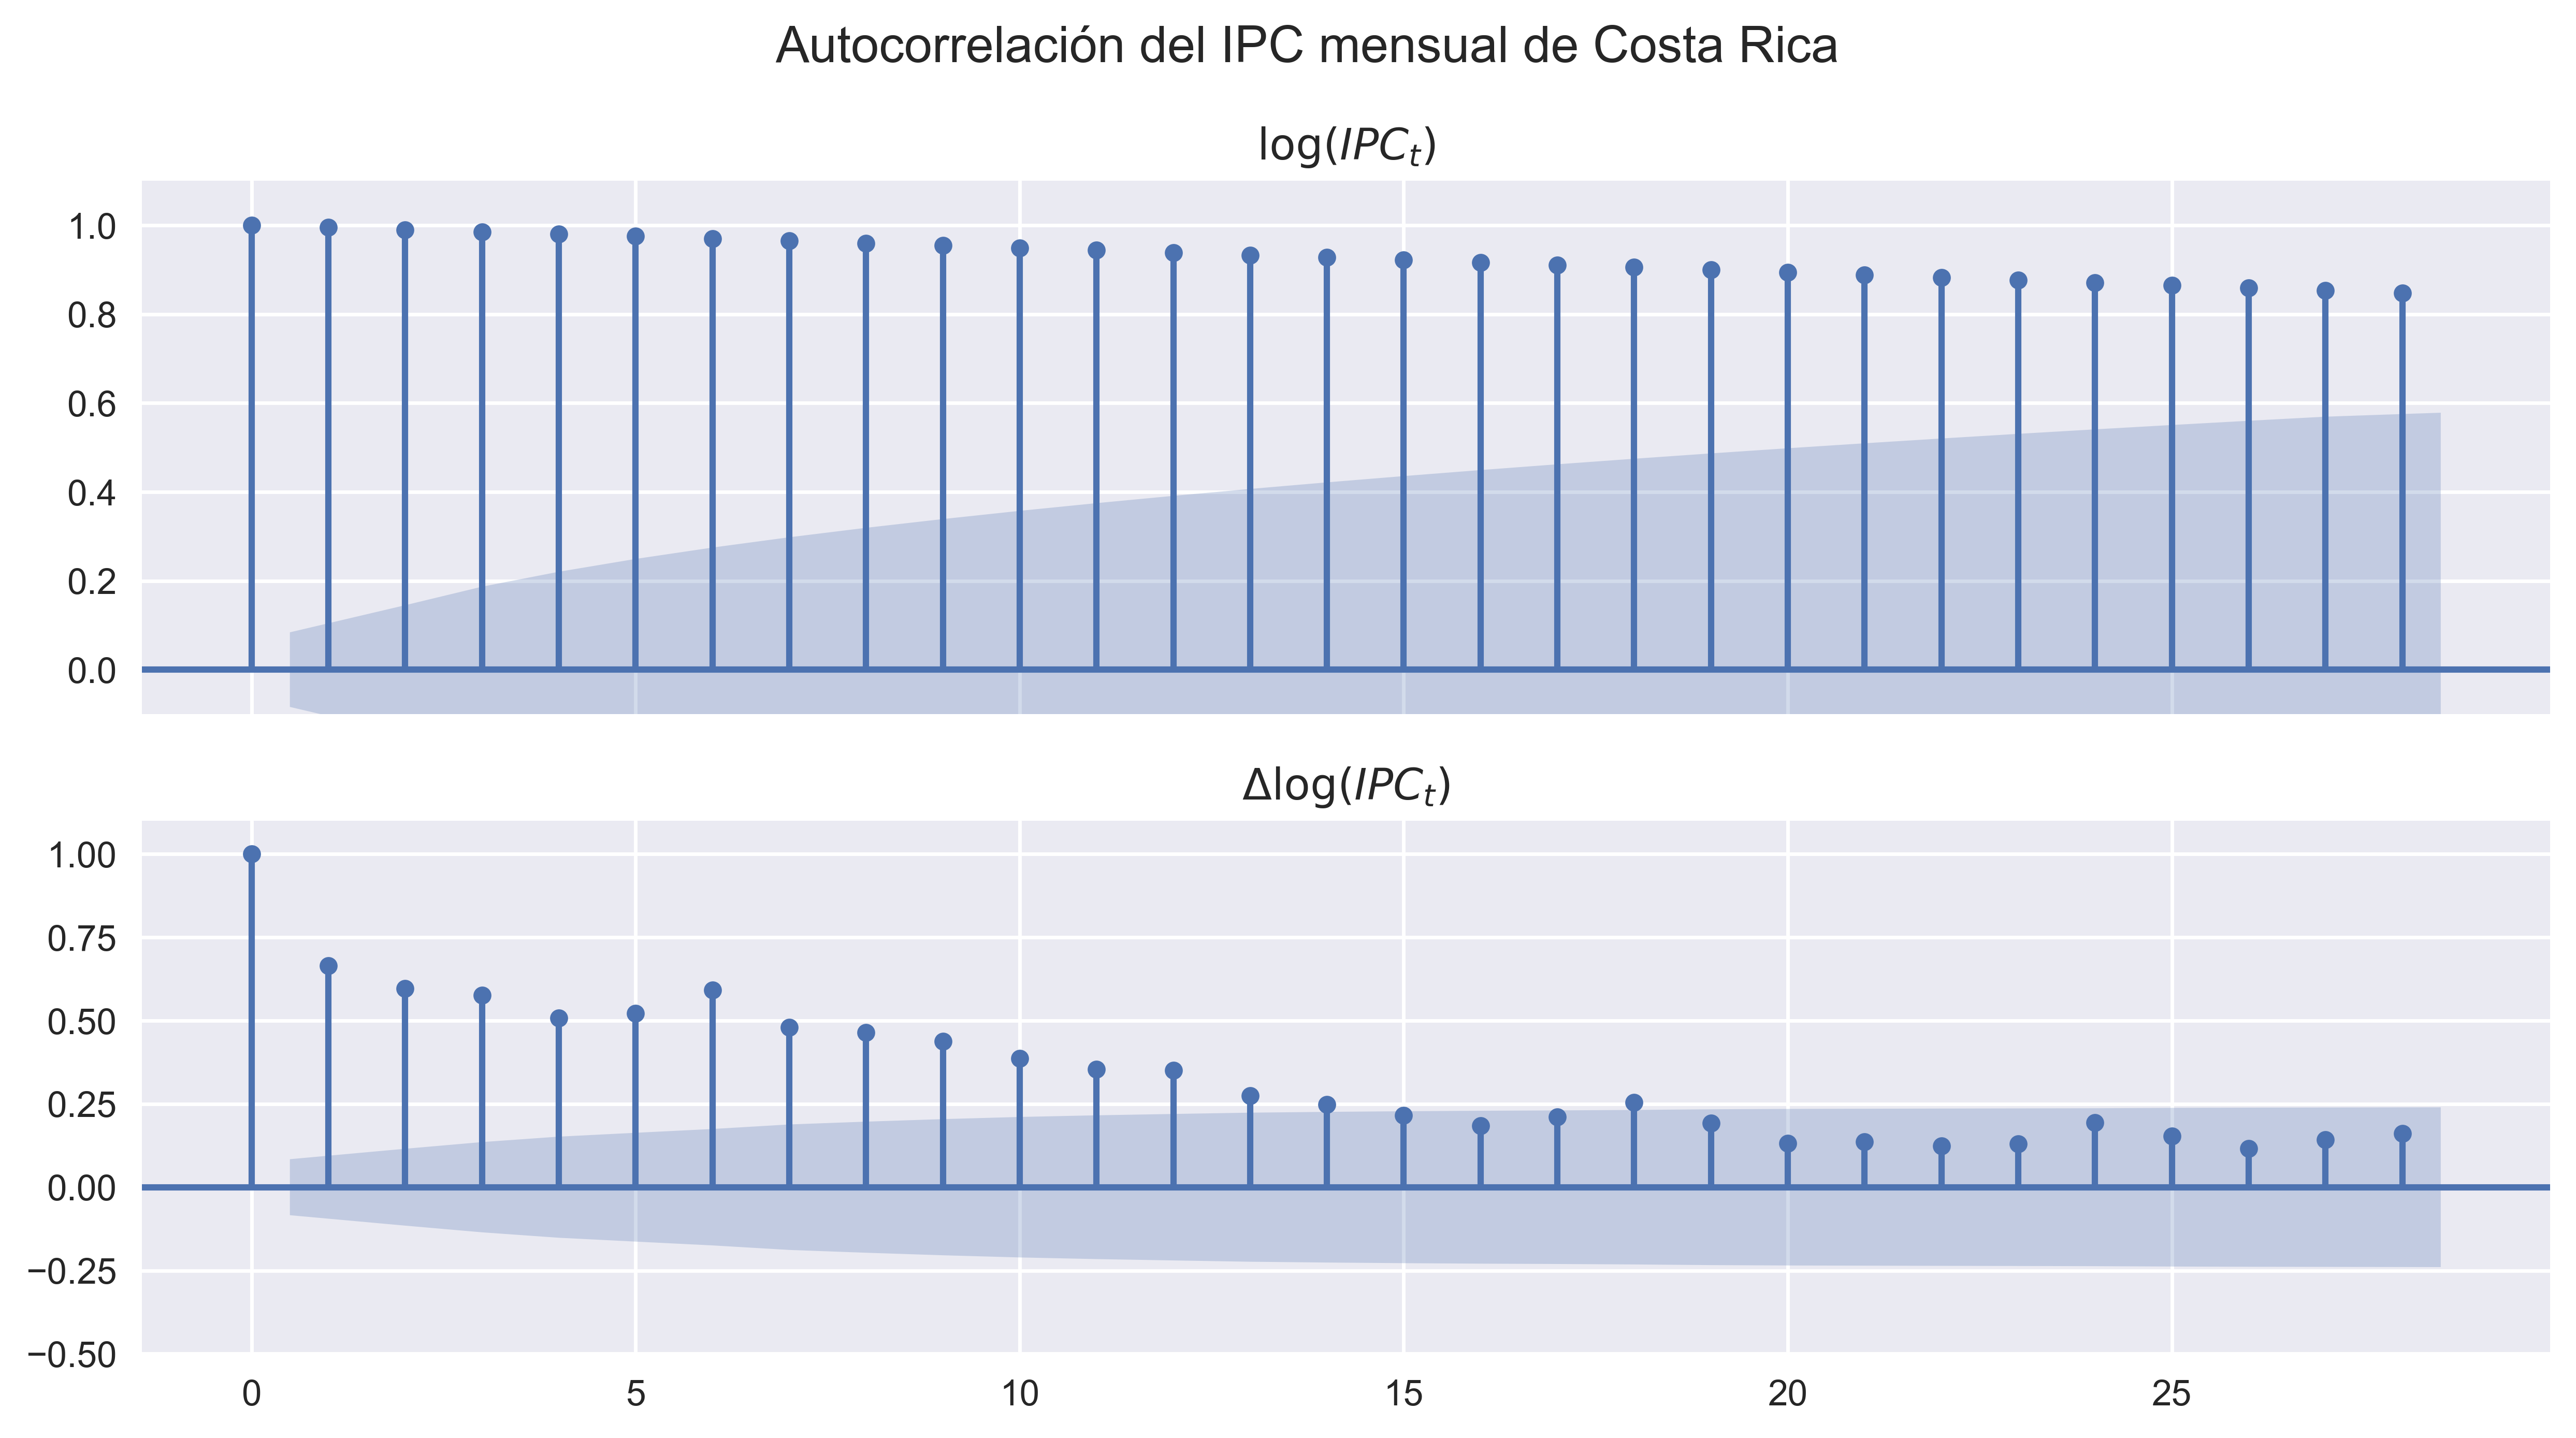

In [5]:
fig,axs = plt.subplots(2,1, sharex=True, figsize=[12,6])
sm.graphics.tsa.plot_acf(log_IPC['log_IPC'],ax=axs[0]);
axs[0].set(ylim=[-0.1,1.1], title='$\log(IPC_t)$')
sm.graphics.tsa.plot_acf(log_IPC['log_IPC'].diff().dropna(),ax=axs[1]);
axs[1].set(ylim=[-0.5,1.1], title='$\Delta\log(IPC_t)$')
fig.suptitle('Autocorrelación del IPC mensual de Costa Rica', fontsize=14);


Para la serie en nivel, parece que no es estacionaria puesto que su autocorrelación disminuye muy lentamente.

(c) (12 puntos) Determine el grado de integración de esta serie, según las pruebas aumentada de
Dickey-Fuller (ADF) y la KPSS. Justifique el número de rezagos que utiliza en cada prueba. Pista:
primero trabaje con la serie en nivel, si es estacionaria entonces es I(0), si no lo es entonces trabaje
con la primera diferencia, si es estacionaria entonces la serie original es I(1), de lo contrario trabaje
con la segunda diferencia y siga iterando este procedimiento hasta encontrar una serie estacionaria.

Primeramente, la cantidad de rezagos que se usa en esta prueba se determina a partir del criterio bayesiano.

In [6]:
#Creación de tabla de Dickey-Fuller
specs = ['nc', 'c', 'ct']
indice = ['sin constante', 'con constante', 'con constante y tendencia']

def DF(datos, spec):
    res = adfuller(datos, maxlag=0,regression=spec)
    resultado = {
        'z':res[0], 
        '1%': res[4]['1%'], 
        '5%': res[4]['5%'], 
        '10%': res[4]['10%']}
    return resultado

def ADF(datos, spec):
    res = adfuller(datos, regression=spec, autolag='BIC')
    resultado = {
        'z':res[0], 
        '1%': res[4]['1%'], 
        '5%': res[4]['5%'], 
        '10%': res[4]['10%'],
        'p': res[2]}
    return resultado

pruebas = {'df':DF, 'adf':ADF}

def tabla_dickey_fuller(serie, test, diff=0):
    datos = log_IPC[serie].diff(diff) if diff else log_IPC[serie]
    resultados = pd.DataFrame([pruebas[test](datos.dropna(), ss) for ss in specs], index=indice).round(3)
    nombre = '_'.join([test,serie,str(diff)])
    resultados.to_latex(nombre + '.tex')
    return resultados

Serie en nivel

In [7]:
tabla_dickey_fuller('log_IPC', 'adf', diff=0)

z     1%     5%    10%  p
sin constante              0.585 -2.570 -1.942 -1.616  6
con constante             -2.561 -3.443 -2.867 -2.570  6
con constante y tendencia -1.092 -3.976 -3.419 -3.132  6

Para cualquier nivel de significancia convencional y cualquier especificación, no se rechazar la hipótesis nula de que el IPC tenga raíz unitaria. Por tanto, según la prueba ADF no sería estacionaria.

Primera diferencia

In [8]:
tabla_dickey_fuller('log_IPC', 'adf', diff=1)

z     1%     5%    10%  p
sin constante             -2.270 -2.570 -1.942 -1.616  5
con constante             -3.194 -3.443 -2.867 -2.570  5
con constante y tendencia -3.954 -3.976 -3.419 -3.132  5

Con una significancia al 5%, se rechaza la hipótesis nula de que la serie del crecimiento del IPC tenga raíz unitaria para las tres especificaciones, sin constante, con constante y con constante y tendencia. Por tanto, según la prueba de ADF, el grado de integración de la serie original se encuentra en I(1), lo cual es consistente con los autocorrelogramas del inciso (b).


Prueba KPSS


In [9]:
def KPSS_una_serie(datos, tipo):
    return [kpss(datos.dropna(), regression=tipo, lags=k)[0] for k in range(19)] 
critical = pd.DataFrame(
    {'c': np.array([0.347, 0.463, 0.574, 0.739]),
     'ct':np.array([0.119, 0.146, 0.176, 0.216])},
    index=['10%', '5%', '2.5%', '1%'])
def tabla_KPSS(diff=0):
    datos = log_IPC['log_IPC'].diff(diff) if diff else log_IPC['log_IPC']
    resultados = pd.DataFrame([KPSS_una_serie(datos, ss) for ss in ['c','ct']], index=['c','ct']).round(3)
    return resultados.T
tab = pd.concat([tabla_KPSS(diff=r) for r in range(6)], axis=1,keys=['nivel','diferencia',"segunda diferencia","tercera diferencia","cuarta diferencia","quinta diferencia"])
tab.to_latex('kpss_log_IPC.tex')
tab

<ipython-input-9-1e4df8bc78f6>:2: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  return [kpss(datos.dropna(), regression=tipo, lags=k)[0] for k in range(19)]
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packa

nivel         diferencia        segunda diferencia        tercera diferencia        cuarta diferencia        quinta diferencia       
         c      ct          c     ct                  c     ct                  c     ct                 c     ct                 c     ct
0   51.779  12.205     10.288  0.499             12.329  0.615             13.511  0.672            14.287  0.706            14.966  0.730
1   25.952   6.122      6.179  0.313              6.563  0.333              6.973  0.350             7.303  0.364             7.592  0.372
2   17.334   4.092      4.504  0.233              4.638  0.240              4.806  0.244             4.978  0.250             5.134  0.253
3   13.024   3.076      3.570  0.188              3.640  0.191              3.731  0.192             3.818  0.193             3.911  0.194
4   10.437   2.467      2.987  0.160              3.024  0.160              3.075  0.160             3.125  0.159             3.181  0.159
5    8.713   2.061      2.577  0.139              2.594  0.139              2.627  0.138             2.660  0.137             2.698  0.136
6    7.481   1.771      2.259  0.123              2.274  0.123              2.299  0.121             2.324  0.120             2.352  0.119
7    6.557   1.554      2.020  0.111              2.029  0.111              2.050  0.109             2.070  0.108             2.093  0.107
8    5.839   1.385      1.831  0.102              1.838  0.101              1.856  0.099             1.872  0.098             1.891  0.097
9    5.264   1.250      1.680  0.094              1.686  0.093              1.701  0.092             1.714  0.091             1.731  0.090
10   4.794   1.139      1.557  0.088              1.561  0.087              1.574  0.086             1.586  0.085             1.601  0.083
11   4.402   1.047      1.455  0.083              1.458  0.082              1.470  0.081             1.480  0.080             1.493  0.078
12   4.070   0.969      1.369  0.078              1.372  0.078              1.382  0.076             1.392  0.076             1.404  0.074
13   3.786   0.903      1.296  0.075              1.298  0.074              1.308  0.073             1.317  0.072             1.328  0.071
14   3.540   0.845      1.234  0.072              1.236  0.071              1.245  0.070             1.253  0.069             1.263  0.068
15   3.325   0.795      1.181  0.070              1.183  0.069              1.191  0.068             1.198  0.067             1.207  0.066
16   3.135   0.750      1.135  0.068              1.136  0.067              1.144  0.066             1.150  0.065             1.158  0.064
17   2.966   0.711      1.094  0.066              1.095  0.065              1.102  0.064             1.108  0.063             1.115  0.062
18   2.815   0.676      1.058  0.064              1.058  0.064              1.065  0.063             1.070  0.062             1.077  0.061

Los valores críticos asintóticos de KPSS, a partir de una simulación de 50 000 iteraciones con 2000 datos, se muestran a continuación. 

In [10]:
critical

c     ct
10%   0.347  0.119
5%    0.463  0.146
2.5%  0.574  0.176
1%    0.739  0.216

El número de rezagos (p) se calculan utilizando el método Legacy. Como se describe en Schwert (1989), el número de rezagos apropiados es (12 * (n / 100)**(1 / 4)).

In [11]:
Legacy = int(12 * (len(log_IPC) / 100)**(1 / 4))
Legacy

18

Debido a que el rezago óptimo es 18, vamos a comparar con este.

En la prueba de KPSS, se rechaza la hipótesis nula de que la serie nivel del IPC sea estacionario para ambas especificaciones y a cualquier nivel de significancia convencional.

Se procede a analizar la prueba para la primera diferencia de la serie. Para la especificación con constante, se rechaza para cualquier nivel de significancia convencional la hipótesis nula de que el crecimiento del IPC sea estacionario. Por otra parte, cuando se incluye constante y tendencia, no se rechaza que el crecimiento del IPC sea estacionario para cualquier nivel de significancia. Existen contradiciones según la especificación que se use. Para prueba de KPSS, el grado de integración de la serie original se encuentra en I(1) si el tipo de serie es con constante y tendencia.

Se procede a analizar el caso de la especificación con constante. Nótese que se rechaza que la serie sea estacionaria no solo para el número de rezago apropiado, sino que para cualquier número de rezagos. Se caulculó los estadísticos de KPSS hasta la quinta diferenciación, sin embargo, lo anterior persiste. Se decidió no analizar más de la quinta diferencia porque los estadísticos más bien tienden a aumentar conforme aumenta el grado de las diferencias. Entonces, para la especificación con constante, la prueba KPSS no puede concluir el grado de integración.

## Pregunta 5

Repita la pregunta 4, pero esta vez con la serie 430 del servicio web del BCCR, que corresponde a la
tasa básica pasiva. Trabaje con la serie en sus unidades originales (no tome el logaritmo de esta serie).

In [12]:
TBP = SW(TBP=430)
SW.quien(430)

Variable 430 >>>
   Nombre      : Tasa básica pasiva calculada por el BCCR.
   Descripcion : Tasa basica pasiva bruta a fin de cada mes calculada por el Banco Central de Costa Rica..
   Unidad      : Porcentaje.
   Periodicidad: Mensual.

|--- Tasas de interés
|------ Tasa básica pasiva calculada por el BCCR [430]'




(a) (4 puntos) Haga un gráfico de la serie. ¿Parece estacionaria? Explique su respuesta.

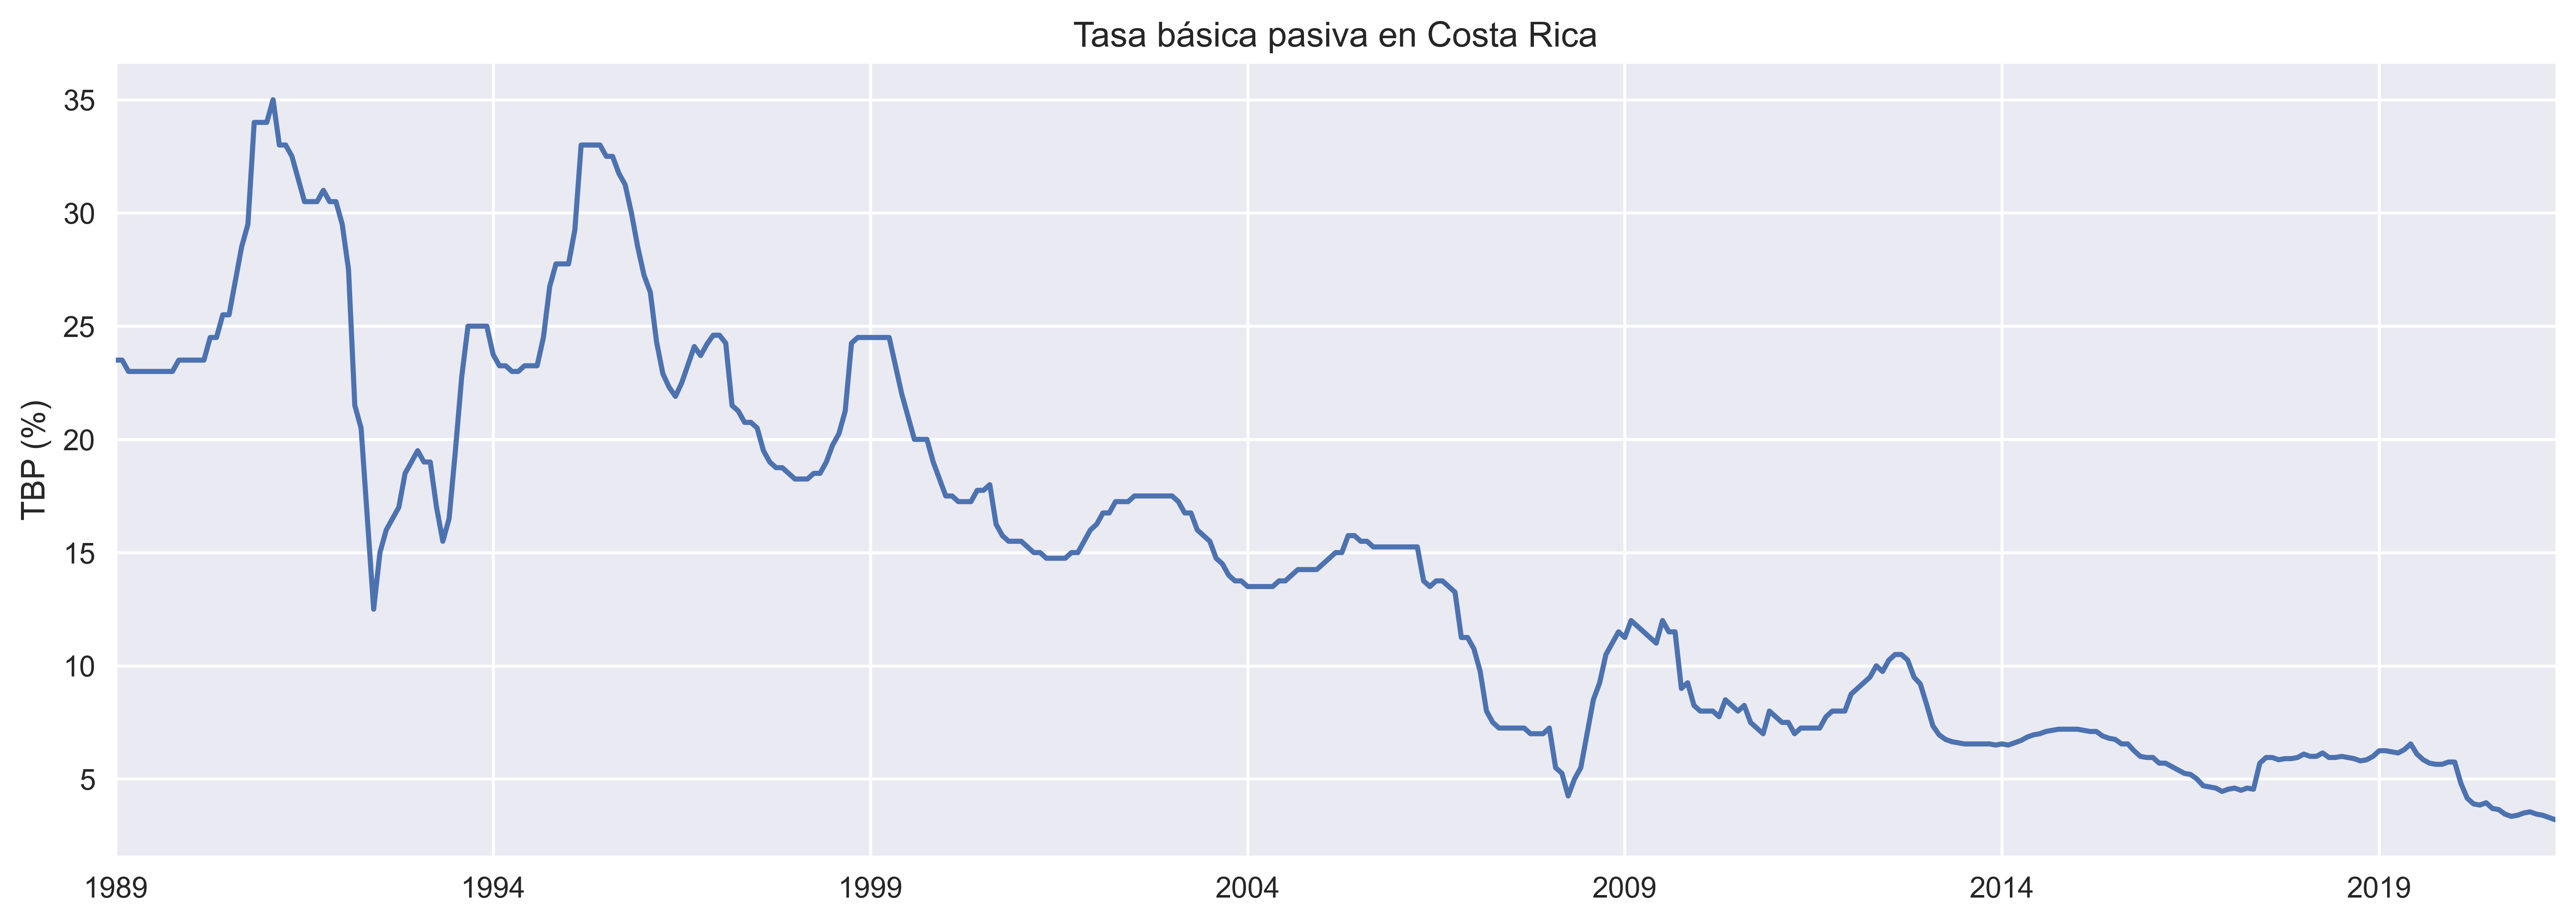

In [14]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(15,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel="", ylabel=y)

figura(TBP,"Tasa básica pasiva en Costa Rica", "TBP (%)")

No parece estacionaria. La serie tiende a disminuir, lo cual quiere decir que la media no es constante en el tiempo.

(b) (4 puntos) Obtenga el autocorrelograma de la serie. ¿Parece estacionaria? Explique su respuesta.

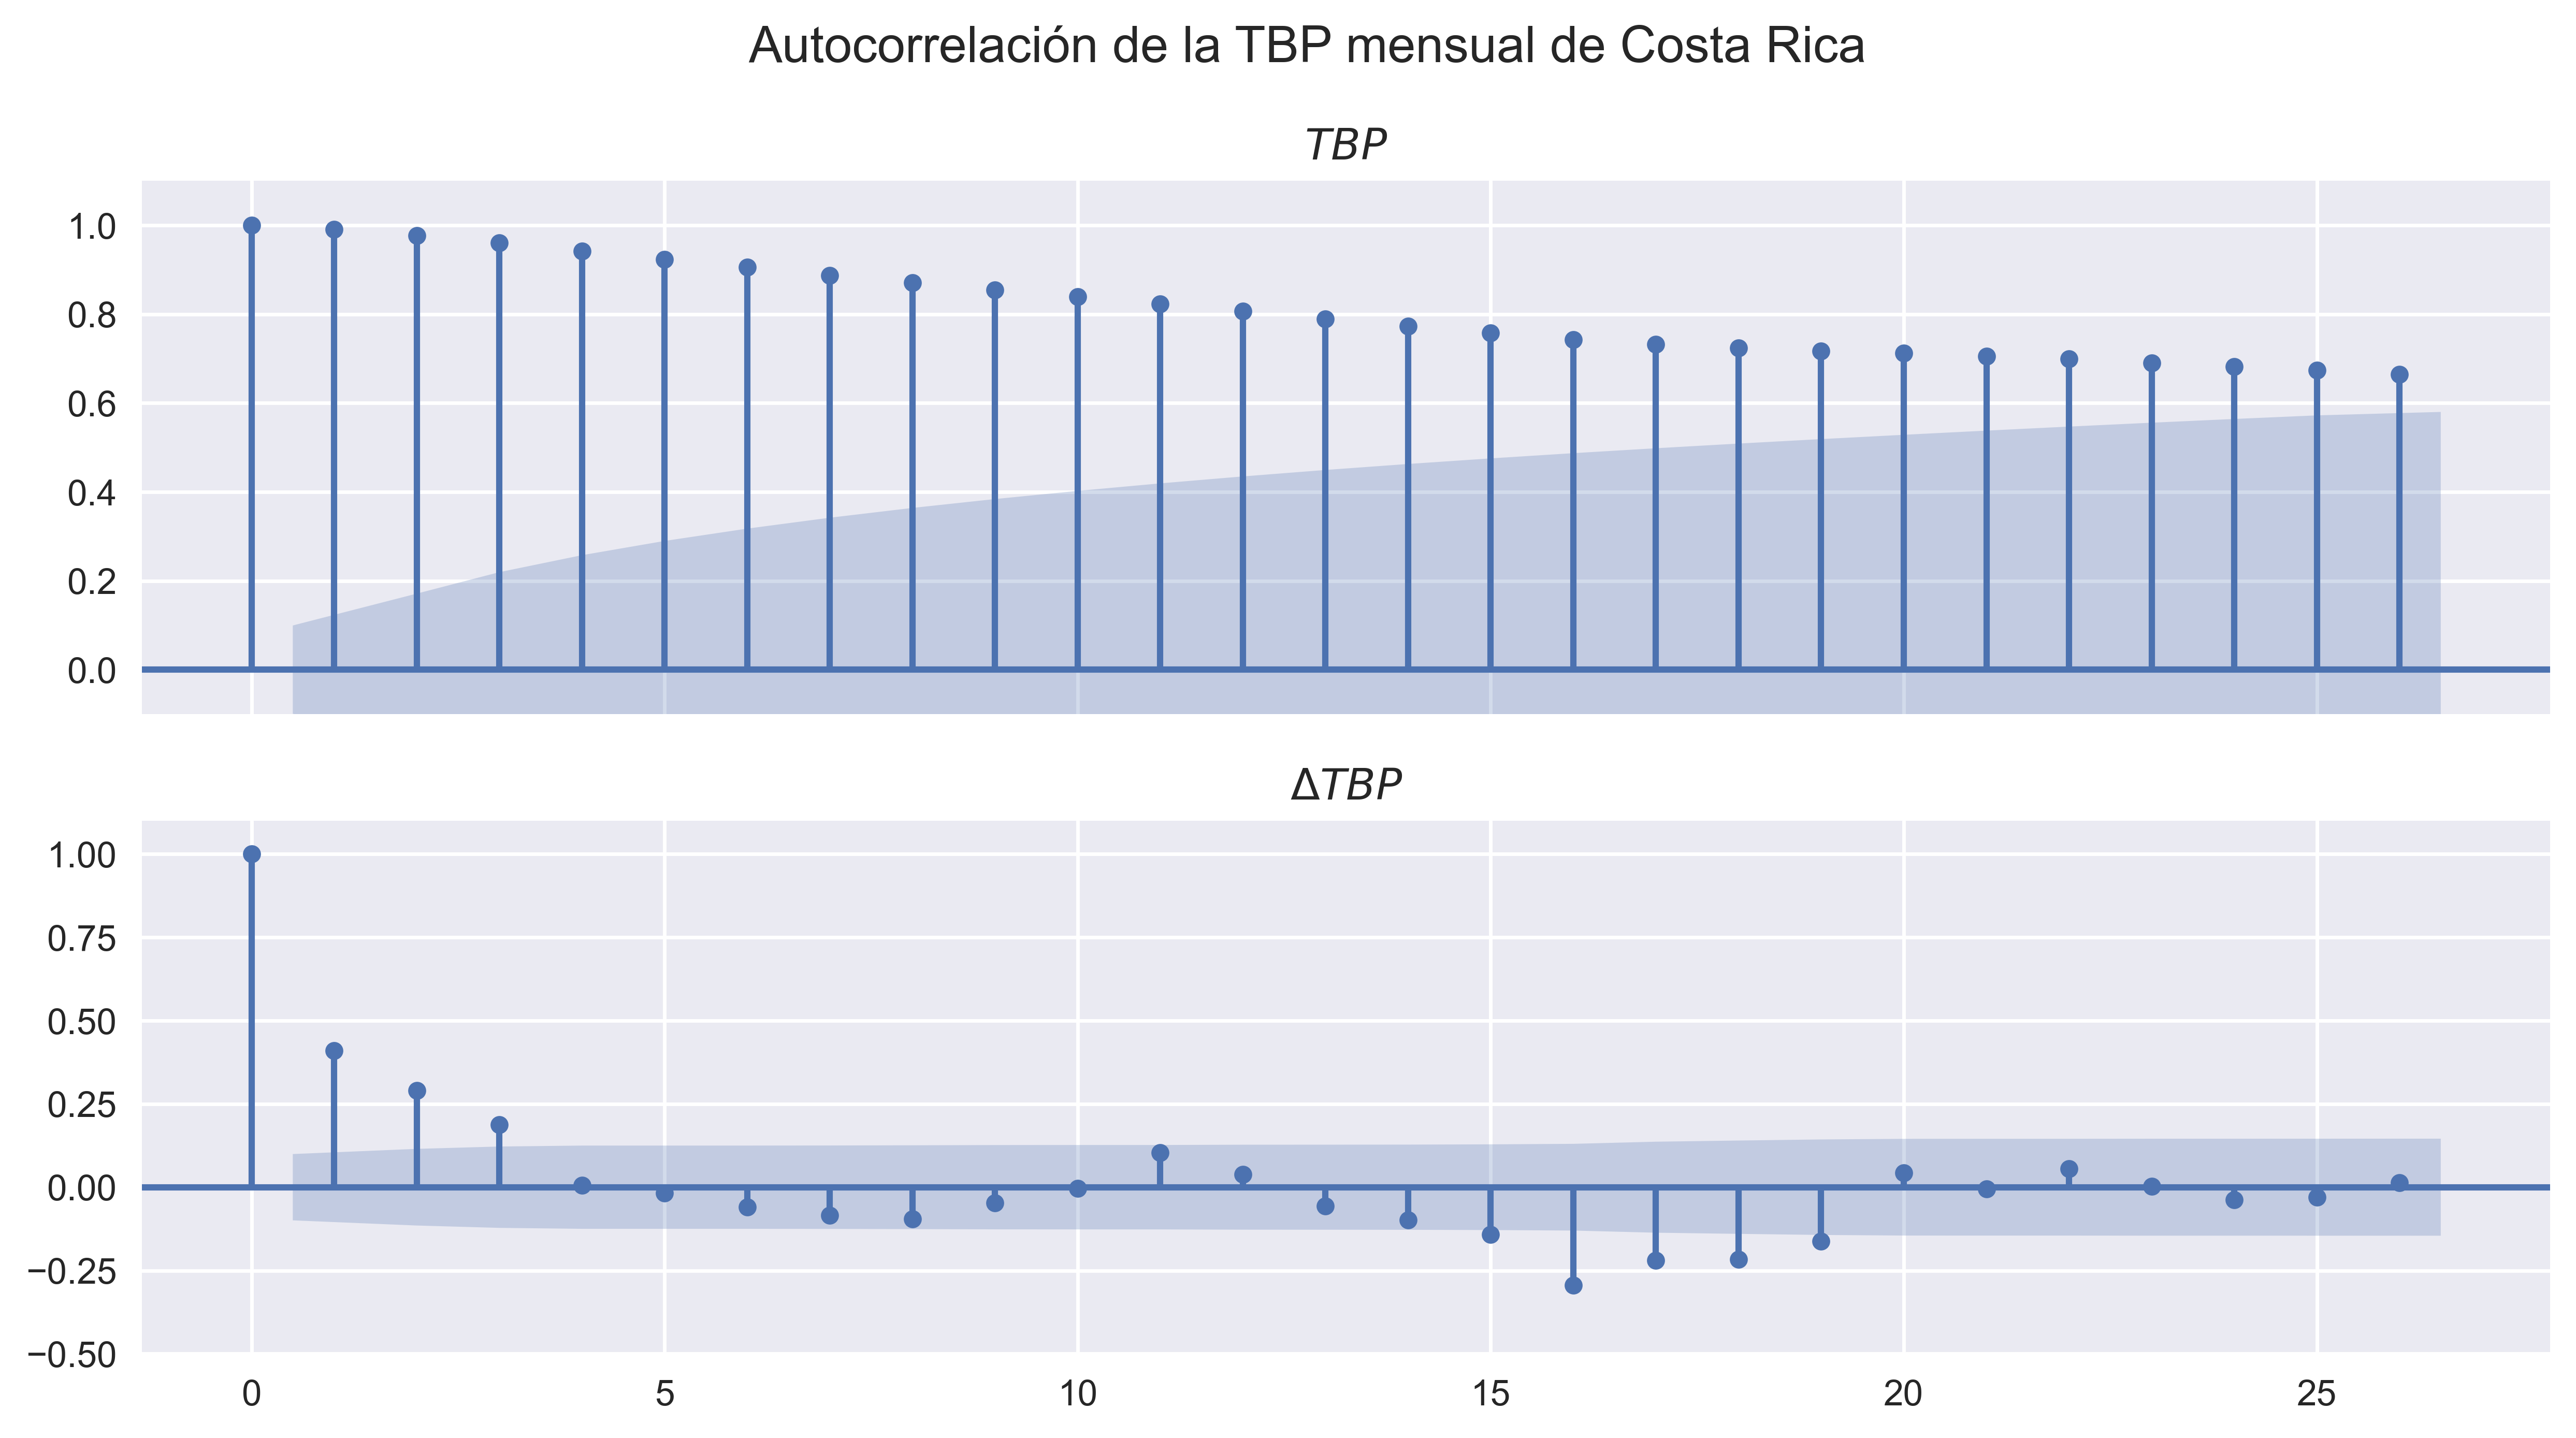

In [15]:
fig,axs = plt.subplots(2,1, sharex=True, figsize=[12,6])
sm.graphics.tsa.plot_acf(TBP['TBP'],ax=axs[0]);
axs[0].set(ylim=[-0.1,1.1], title='$TBP$')
sm.graphics.tsa.plot_acf(TBP['TBP'].diff().dropna(),ax=axs[1]);
axs[1].set(ylim=[-0.5,1.1], title='$\Delta TBP$')
fig.suptitle('Autocorrelación de la TBP mensual de Costa Rica', fontsize=14);

La serie en nivel parece que no es estacionaria, puesto que la autocorrelación de la TBP mensual disminuyen muy lentamente. 

(c) (12 puntos) Determine el grado de integración de esta serie, según las pruebas aumentada de
Dickey-Fuller (ADF) y la KPSS. Justifique el número de rezagos que utiliza en cada prueba. Pista:
primero trabaje con la serie en nivel, si es estacionaria entonces es I(0), si no lo es entonces trabaje
con la primera diferencia, si es estacionaria entonces la serie original es I(1), de lo contrario trabaje
con la segunda diferencia y siga iterando este procedimiento hasta encontrar una serie estacionaria.

Primeramente, la cantidad de rezagos que se usa en esta prueba se determina a partir del criterio Bayesiano.

In [16]:
def tabla_dickey_fuller1(serie, test, diff=0):
    datos = TBP[serie].diff(diff) if diff else TBP[serie]
    resultados = pd.DataFrame([pruebas[test](datos.dropna(), ss) for ss in specs], index=indice).round(3)
    nombre = '_'.join([test,serie,str(diff)])
    resultados.to_latex(nombre + '.tex')
    return resultados

Serie en nivel

In [17]:
tabla_dickey_fuller1('TBP', 'adf', diff=0)

z     1%     5%    10%  p
sin constante             -1.393 -2.572 -1.942 -1.616  2
con constante             -1.691 -3.447 -2.869 -2.571  2
con constante y tendencia -4.734 -3.982 -3.422 -3.134  2

Para cualquier nivel de significancia convencional, no se rechaza la hipótesis nula de que la TBP tenga raíz unitaria si se usa las especificaciones sin o con constante . Por tanto, según la prueba ADF no es estacionaria.

Para cualquier nivel de significancia convencional, se rechaza la hipótesis nula de que la TBP tenga raíz unitaria si se usa la especificación con constante y tendencia.



Como las pruebas ADF presentan contradicciones según la especificación que se use, vale la pena analizar más a detalle cada una de ellas. Se procede a analizar los residuos de los datos para cada especificación. Si los residuos de una especificación se ajustan más a un ruido blanco (media y varianza constante), brindaría indicios de que esa especificación se ajusta más a la serie.

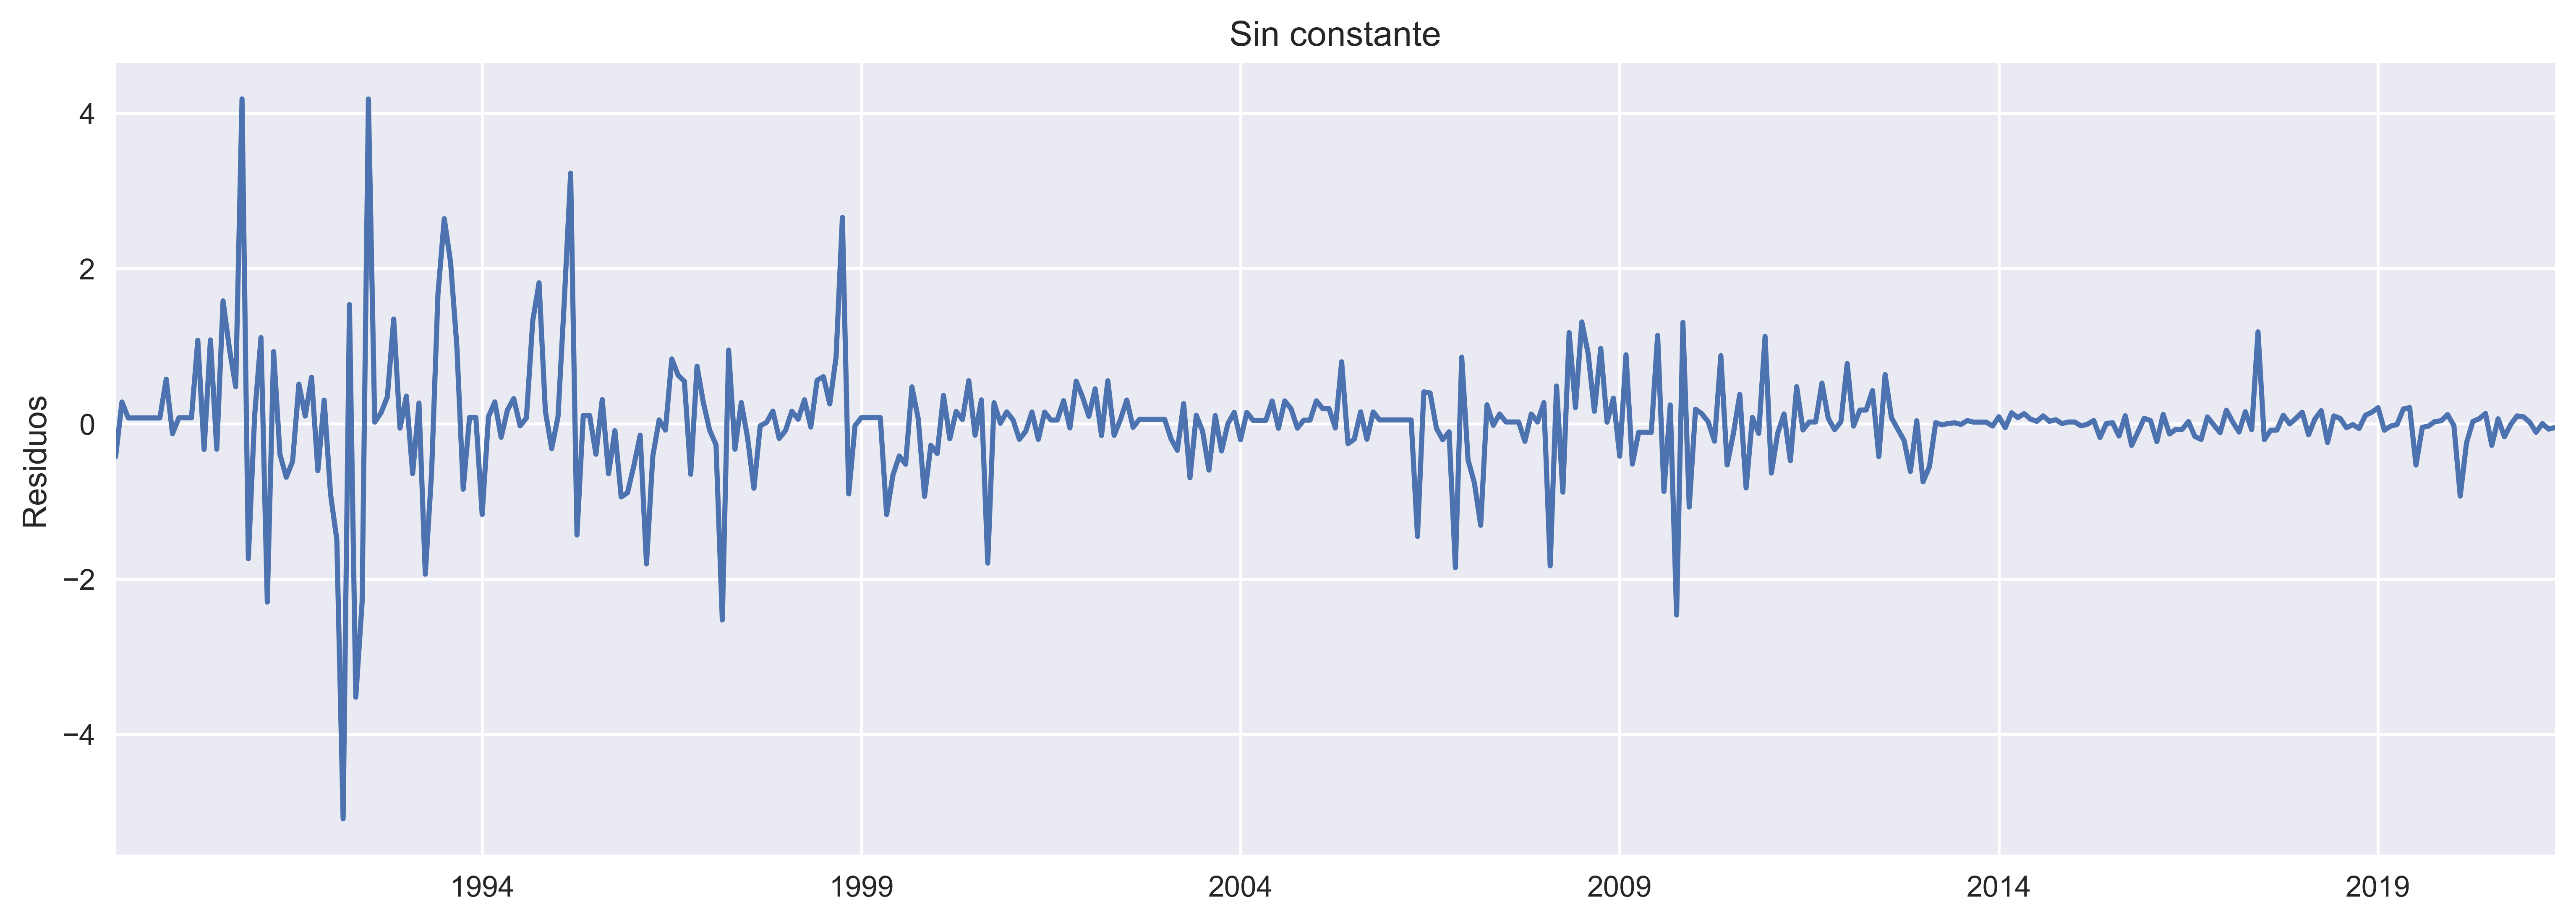

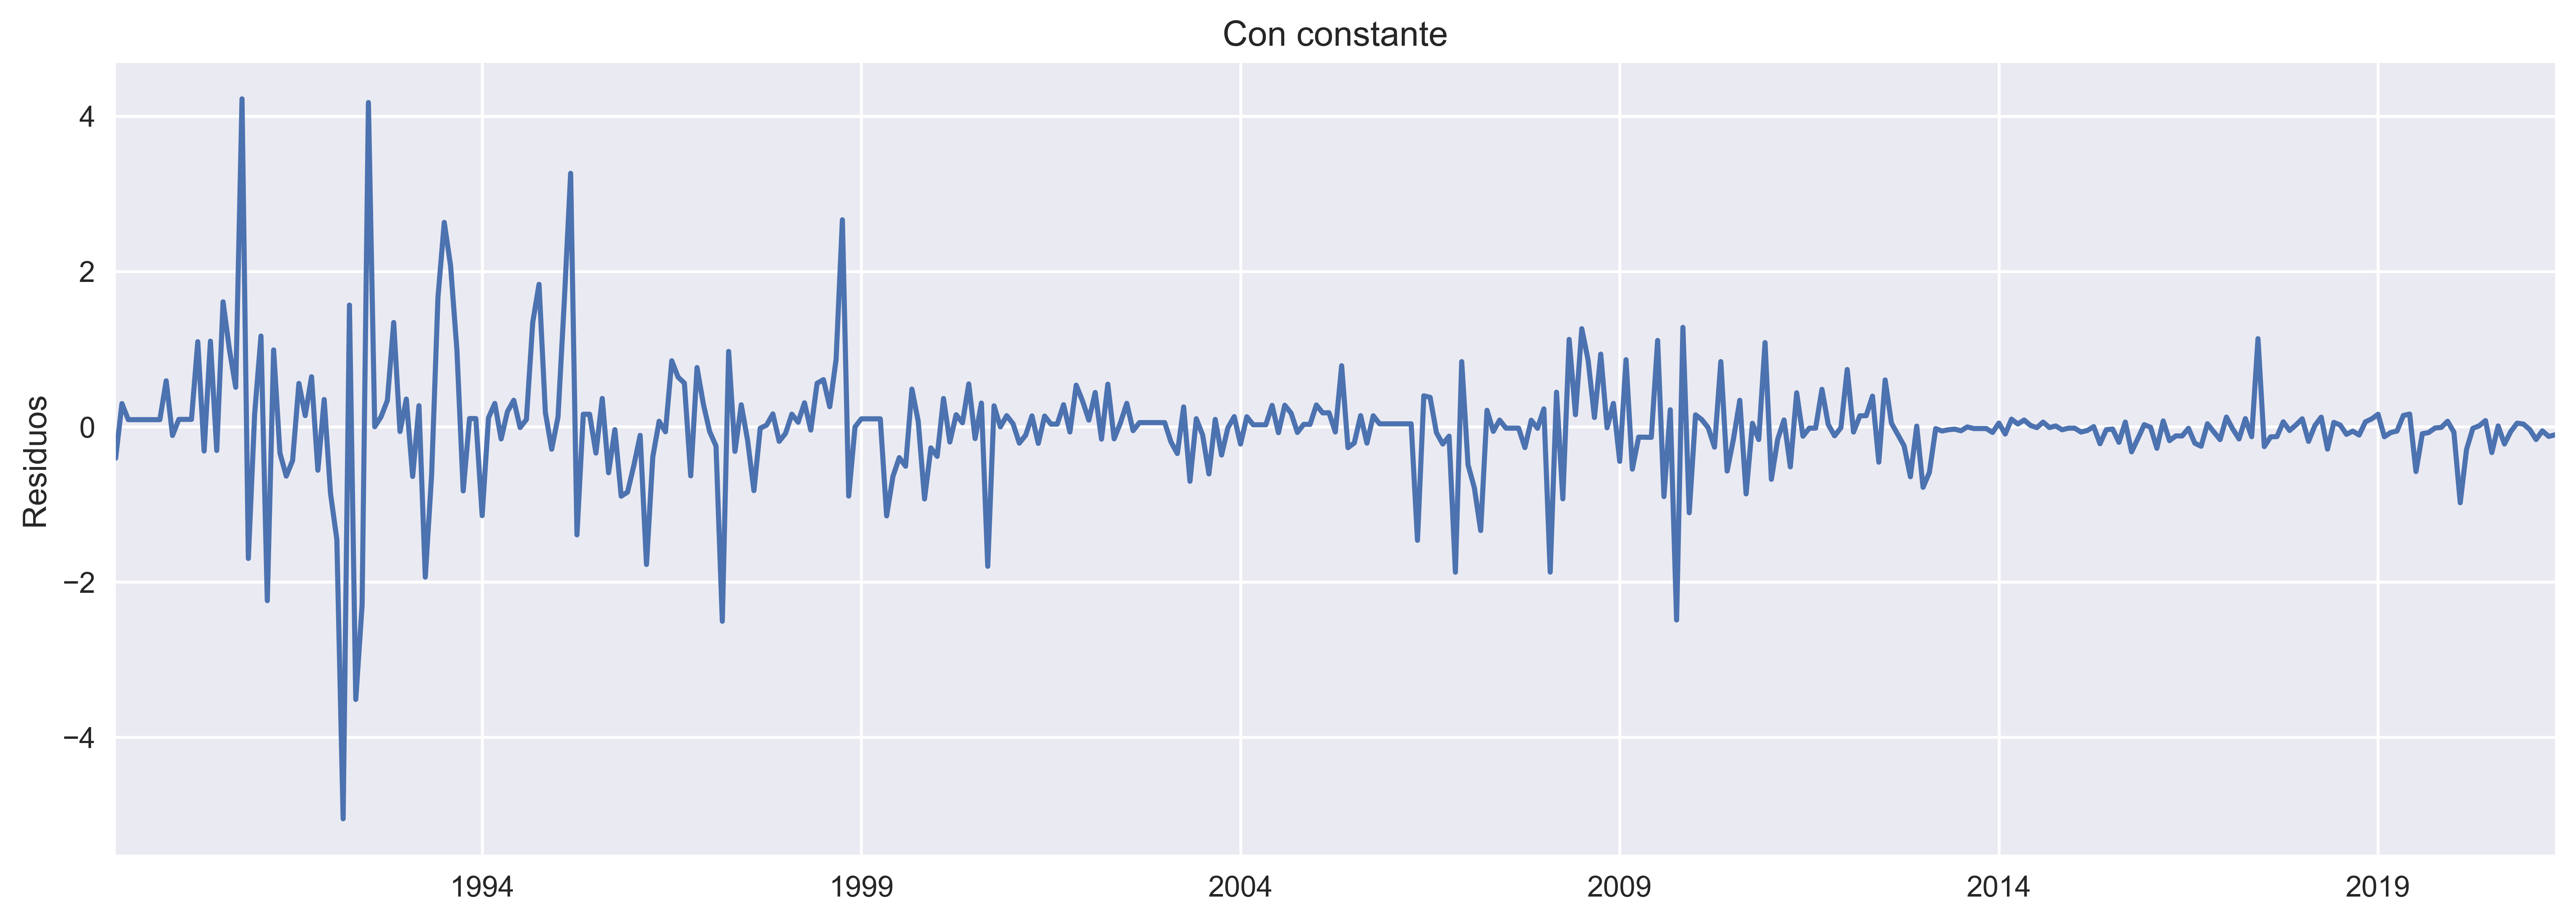

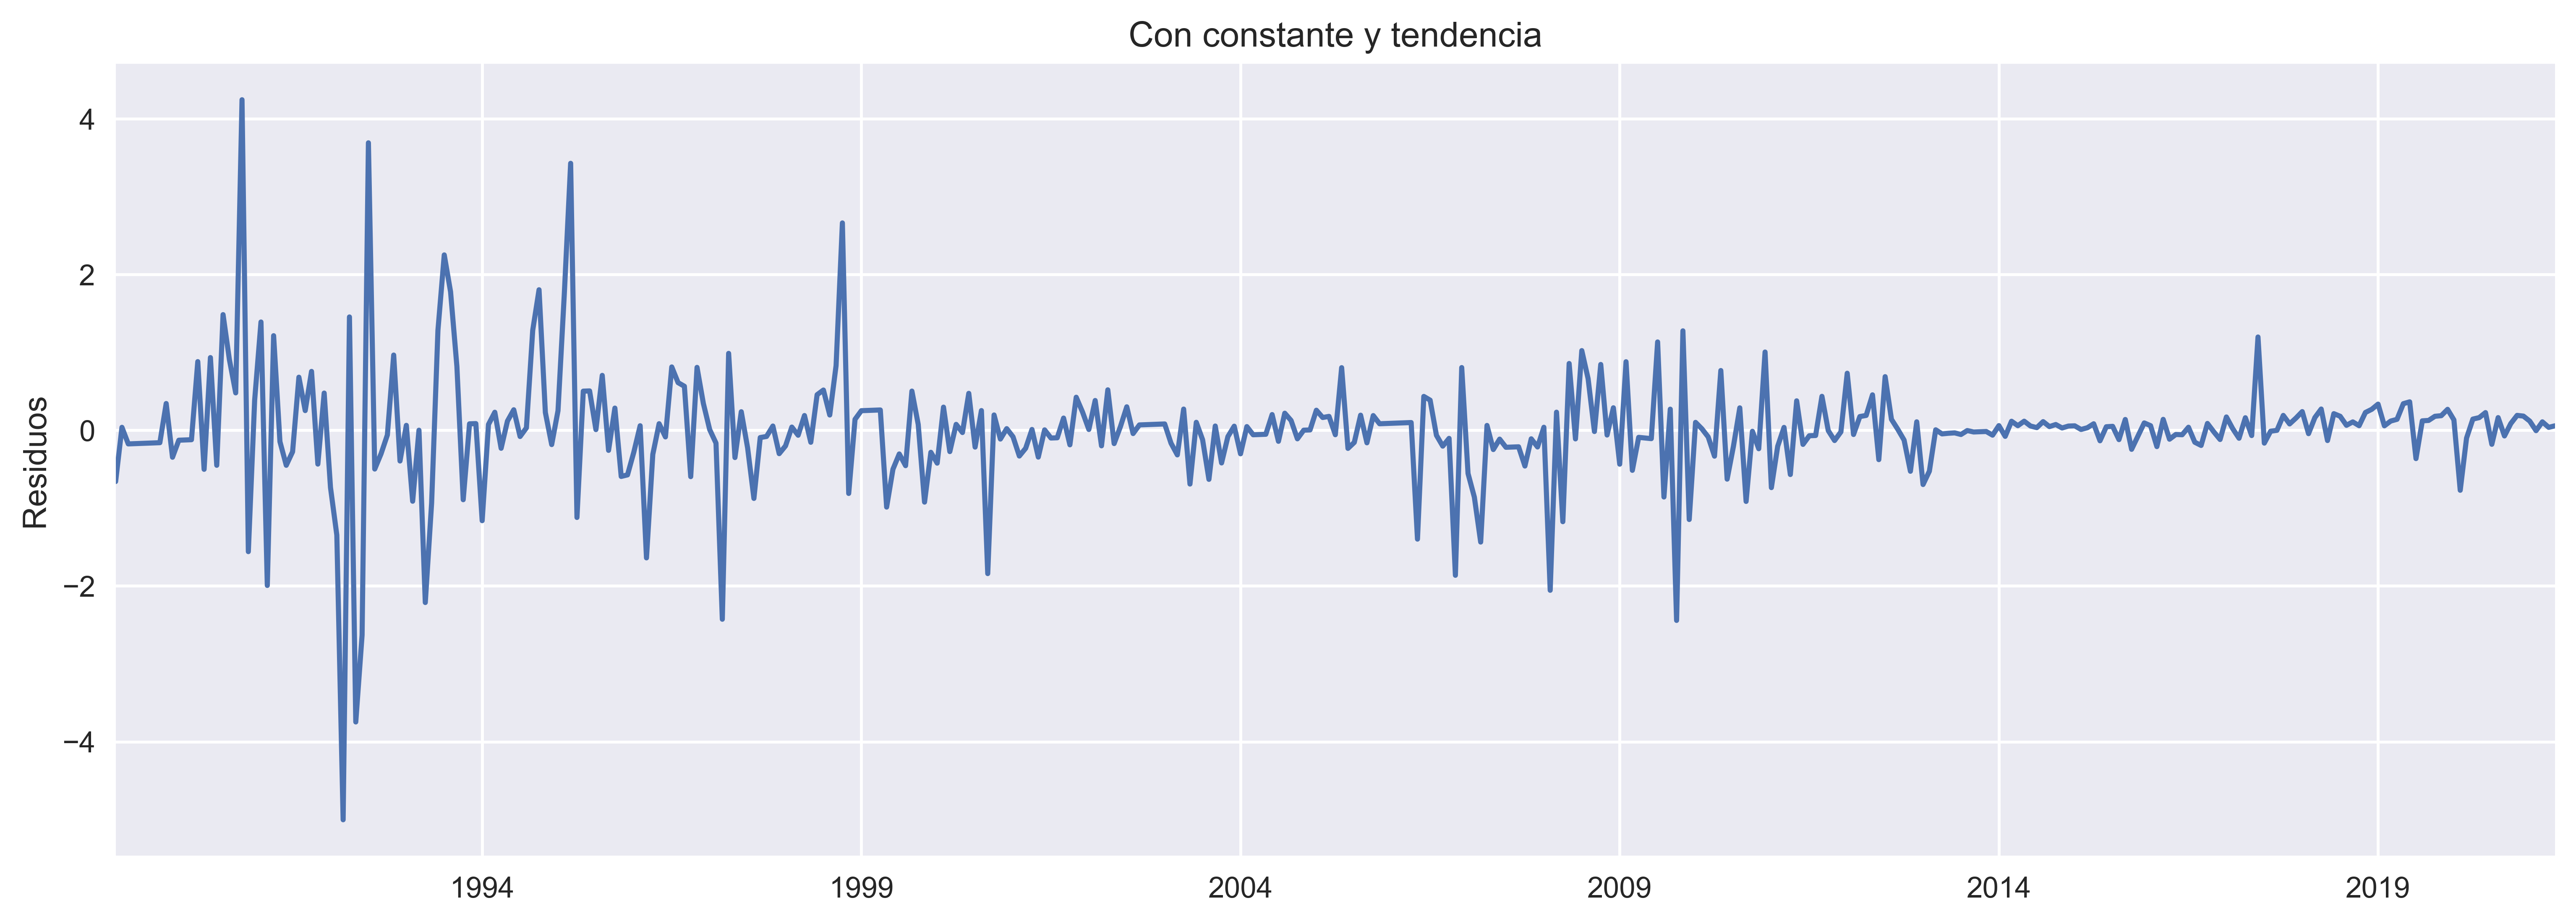

In [19]:
TBP.columns=["TBP"]
cambioTBP = TBP.diff(1)
cambioTBP["T"] =np.arange(cambioTBP.shape[0])
cambioTBP["rezago1"]=TBP.shift(1)
cambioTBP["rezago2"]=TBP.shift(2)
cambioTBP=cambioTBP.assign(Constante=1)
modelo0= ols("TBP ~ rezago1 + rezago2 -1",cambioTBP).fit()
modelo1= ols("TBP ~ Constante + rezago1 + rezago2",cambioTBP).fit()
modelo2= ols("TBP ~ Constante + T + rezago1 + rezago2",cambioTBP).fit()

res0=modelo0.resid
res1=modelo1.resid
res2=modelo2.resid
figura(res0,"Sin constante","Residuos")
figura(res1,"Con constante","Residuos")
figura(res2,"Con constante y tendencia","Residuos")

Los términos de error de las tres especificaciones tienen comportamientos identicos, en términos prácticos. Por tanto, no existe forma de determinar cuál especificación es mejor.

Se procede a hacer el análisis considerando los tres posibles comportamientos de la serie con la primera diferencia.

In [20]:
tabla_dickey_fuller1('TBP', 'adf', diff=1)

z     1%     5%    10%  p
sin constante             -9.148 -2.572 -1.942 -1.616  1
con constante             -9.165 -3.447 -2.869 -2.571  1
con constante y tendencia -9.155 -3.982 -3.422 -3.134  1

Para cualquier nivel de significancia convencional, se rechaza la hipótesis nula de que el crecimiento de la TBP, para todas las especificaciones, tengan raíz unitaria. Por tanto, la prueba ADF no rechaza que sea estacionario. Entonces, el grado de integración de la serie original se encuentra en I(1). Nótese que, a diferencia de las pruebas de la serie nivel, no se presentan contradicciones según las especificaciones. Esto sugiere que el grado de integración I(1) es más probable, lo cual es acorde con los autocorrelogramas del inciso (b).

Prueba KPSS

In [21]:
def tabla_KPSS1(diff=0):
    datos = TBP['TBP'].diff(diff) if diff else TBP['TBP']
    resultados = pd.DataFrame([KPSS_una_serie(datos, ss) for ss in ['c','ct']], index=['c','ct']).round(3)
    return resultados.T
tab = pd.concat([tabla_KPSS1(diff=r) for r in range(3)], axis=1,keys=['nivel','diferencia'])
tab.to_latex('kpss_TBP.tex')
tab



<ipython-input-9-1e4df8bc78f6>:2: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  return [kpss(datos.dropna(), regression=tipo, lags=k)[0] for k in range(19)]
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\EHZ\anaconda3\lib\site-packa

nivel        diferencia       
         c     ct          c     ct
0   33.549  1.197      0.056  0.054
1   16.853  0.609      0.040  0.038
2   11.287  0.414      0.032  0.031
3    8.507  0.317      0.028  0.027
4    6.842  0.260      0.026  0.025
5    5.734  0.223      0.025  0.024
6    4.944  0.197      0.024  0.023
7    4.352  0.178      0.024  0.023
8    3.891  0.163      0.024  0.023
9    3.524  0.152      0.024  0.023
10   3.223  0.143      0.024  0.024
11   2.972  0.136      0.024  0.024
12   2.760  0.130      0.024  0.023
13   2.578  0.126      0.024  0.023
14   2.421  0.122      0.024  0.024
15   2.284  0.119      0.025  0.024
16   2.163  0.117      0.025  0.024
17   2.055  0.115      0.026  0.025
18   1.958  0.114      0.027  0.026

Los valores críticos asintóticos de KPSS, a partir de una simulación de 50 000 iteraciones con 2000 datos, se muestran a continuación. 

In [22]:
critical

c     ct
10%   0.347  0.119
5%    0.463  0.146
2.5%  0.574  0.176
1%    0.739  0.216

El número de rezagos (p) se calculan utilizando el método Legacy. Como se describe en Schwert (1989), el número de rezagos apropiados es (12 * (n / 100)**(1 / 4)).

In [23]:
Legacy1 = int(12 * (len(TBP) / 100)**(1 / 4))
Legacy1

16

Debido a que el rezago óptimo es 16, se va a evaluar con ese rezago.

Para la prueba de KPSS de la serie en nivel, con la constante, se rechaza la hipótesis nula, para cualquier nivel de significancia convencional, de que la TBP sea estacionario.
Con la constante y la tendencia, con un nivel de significancia del 1%, no se rechaza que la TBP sea estacionario. Por tanto, si la serie tiene constante y tendencia, según la prueba de KPSS el grado de integración sería I(0). 

En la prueba de KPSS, se presentan resultados contradictorios según la especificación que se utiliza, similar a los de la prueba ADF.

Se procede a evaluar los resultados de la prueba KPSS para la diferencia de la serie. Para la especificación con constante, no se rechaza la hipótesis nula, para cualquier nivel de significancia convencional, que el crecimiento de la TBP sea estacionario. Tampoco se rechaza para la especificación con constante y tendencia. Entonces, el grado de integración de la serie original se encuentra en I(1). Nótese que, a diferencia de las pruebas de la serie nivel, no se presentan contradicciones según las especificaciones. Esto sugiere que el grado de integración I(1) es más probable, lo cual es acorde con los autocorrelogramas del inciso (b).


## Pregunta 6
¿Puede existir relaciones espurias entre series estacionarias? Para contestar esta pregunta, se sugiere:

(a) (0 puntos ) Observe el video Laboratorio: Series con raiz unitaria Parte 3– Regresion espuria, en
el que se explica cómo Granger y Newbold (1974) mostraron por medio de simulaciones de Monte
Carlo la existencia de relaciones espurias entre series que tienen raíz unitaria.

(b) (20 puntos ) Realice un experimento de Monte Carlo similar al del video, pero en vez de simular
dos caminatas aleatorias independientes esta vez simule los procesos:

yt = 0.8yt−1 + ϵt, ϵt ∼ N(0, 1)

xt = 0.8xt−1 + εt, εt ∼ N(0, 1)

donde los proceso ϵt y εt son independientes. Para sus simulaciones, tome como valores iniciales
x0 = y0 = 0.


In [24]:
def regresion_estacionaria(phi, T=100): #hacer una simulacion
    ey, ex = np.random.randn(2,T) #errores
    
    y = np.zeros_like(ey)
    x = np.zeros_like(ex)
    
    for t in range(1, T):
        y[t] = phi*y[t-1] + ey[t]
        x[t] = phi*x[t-1] + ex[t]
        
    X = sm.add_constant(x)
    res = sm.OLS(y, X).fit()
    return res.tvalues[1]

def histo(phi, tvalues): #crear histograma
    fig, ax = plt.subplots(figsize=[15, 4])

    maxtval = 12
    t5crit = t_Student.isf(0.05/2, 98)

    # regresión estacionaria
    ff, edges = np.histogram(tvalues, bins=100, density=True)
    center = (edges[1:] + edges[:-1])/2
    w = center[1] - center[0]

    ax.bar(center, ff, width=w, alpha=0.5)
    xvals = np.linspace(-4,4, 200)
    ax.plot(xvals, t_Student.pdf(xvals, df=98), '-r')
    ax.set(xlim=[-maxtval, maxtval])
    ax.legend(['Distribución t-student teórica', 'Distribución simulada'], loc='upper left')
    ax.set_title("Distribución estadístico t regresión de dos series estacionarias AR(1) independientes \n" +
    "$y_t = $" + phi +"$y_{t-1}+ \varepsilon_t \qquad$ $x_t =$" + phi +"$x_{t-1}+ \epsilon_t}$")

    # valores críticos
    opciones = dict(ls="--", color='red')
    ax.axvline(t5crit, **opciones)
    ax.axvline(-t5crit, **opciones)
    
    ar5 = tvalues.quantile(0.05)
    ax.axvline(ar5, ls="--", color='gray')
    ax.axvline(-ar5, ls="--", color='gray')
    
    # error tipo I
    err1 = (tvalues.abs() > t5crit).mean()*100
    ax.annotate(f'Prob$\\left(|t| > 1.984\\right)$ = {err1:.2f}%', (-10,0.25), size=15)
    
    ax.annotate(f'Prob$\\left(|t| > {-ar5:.2f}\\right)$ = 5%', (-10,0.18), size=15)
    
    ax.grid(False)


Nota: para complementar el análisis, se decidió agregar otros experimentos de Monte Carlo con otros valores de $\phi$, constante que acompaña el término autorregresivo, además del requerido por el ejercicio.

In [25]:
#Experimentos de Monte Carlo, N iteraciones cada una

N=100_000
tvalues3 = pd.Series([regresion_estacionaria(0.3) for _ in range(N)])
tvalues5 = pd.Series([regresion_estacionaria(0.5) for _ in range(N)])
tvalues8 = pd.Series([regresion_estacionaria(0.8) for _ in range(N)])
tvalues9 = pd.Series([regresion_estacionaria(0.9) for _ in range(N)])

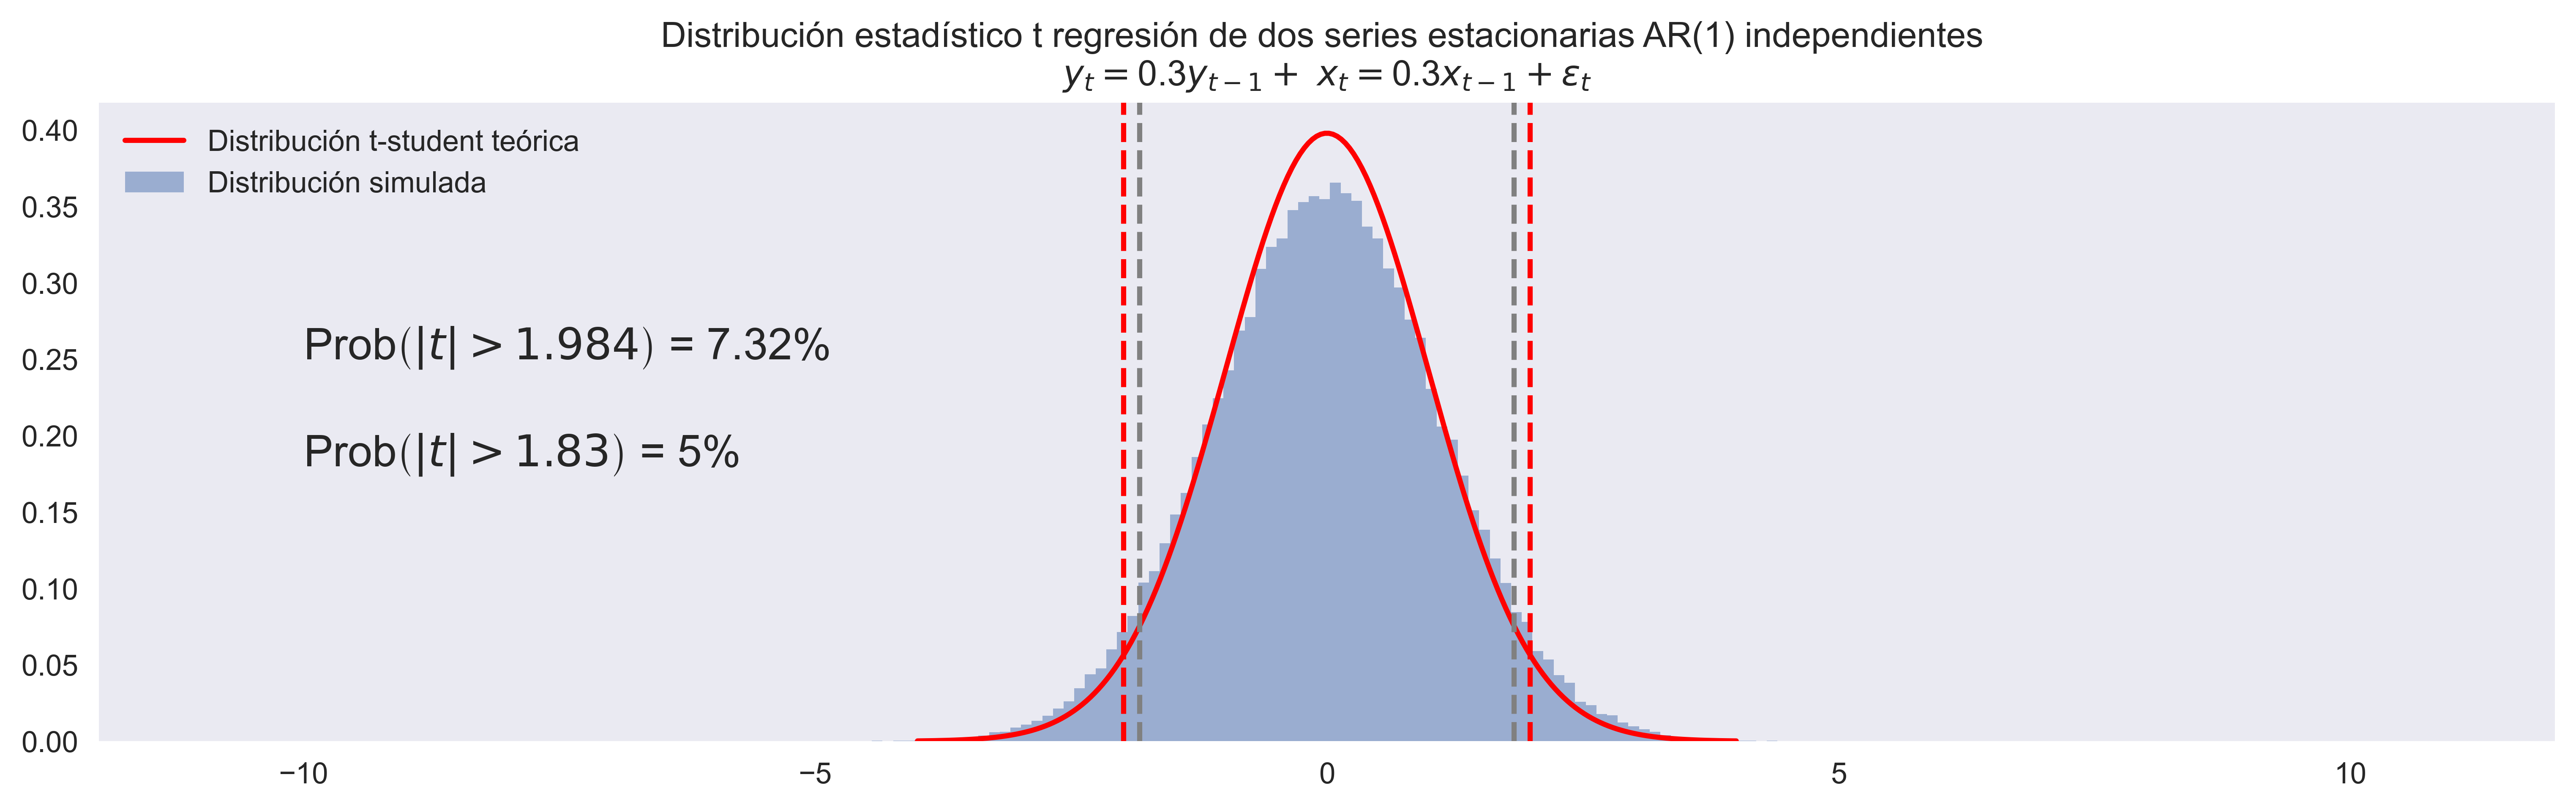

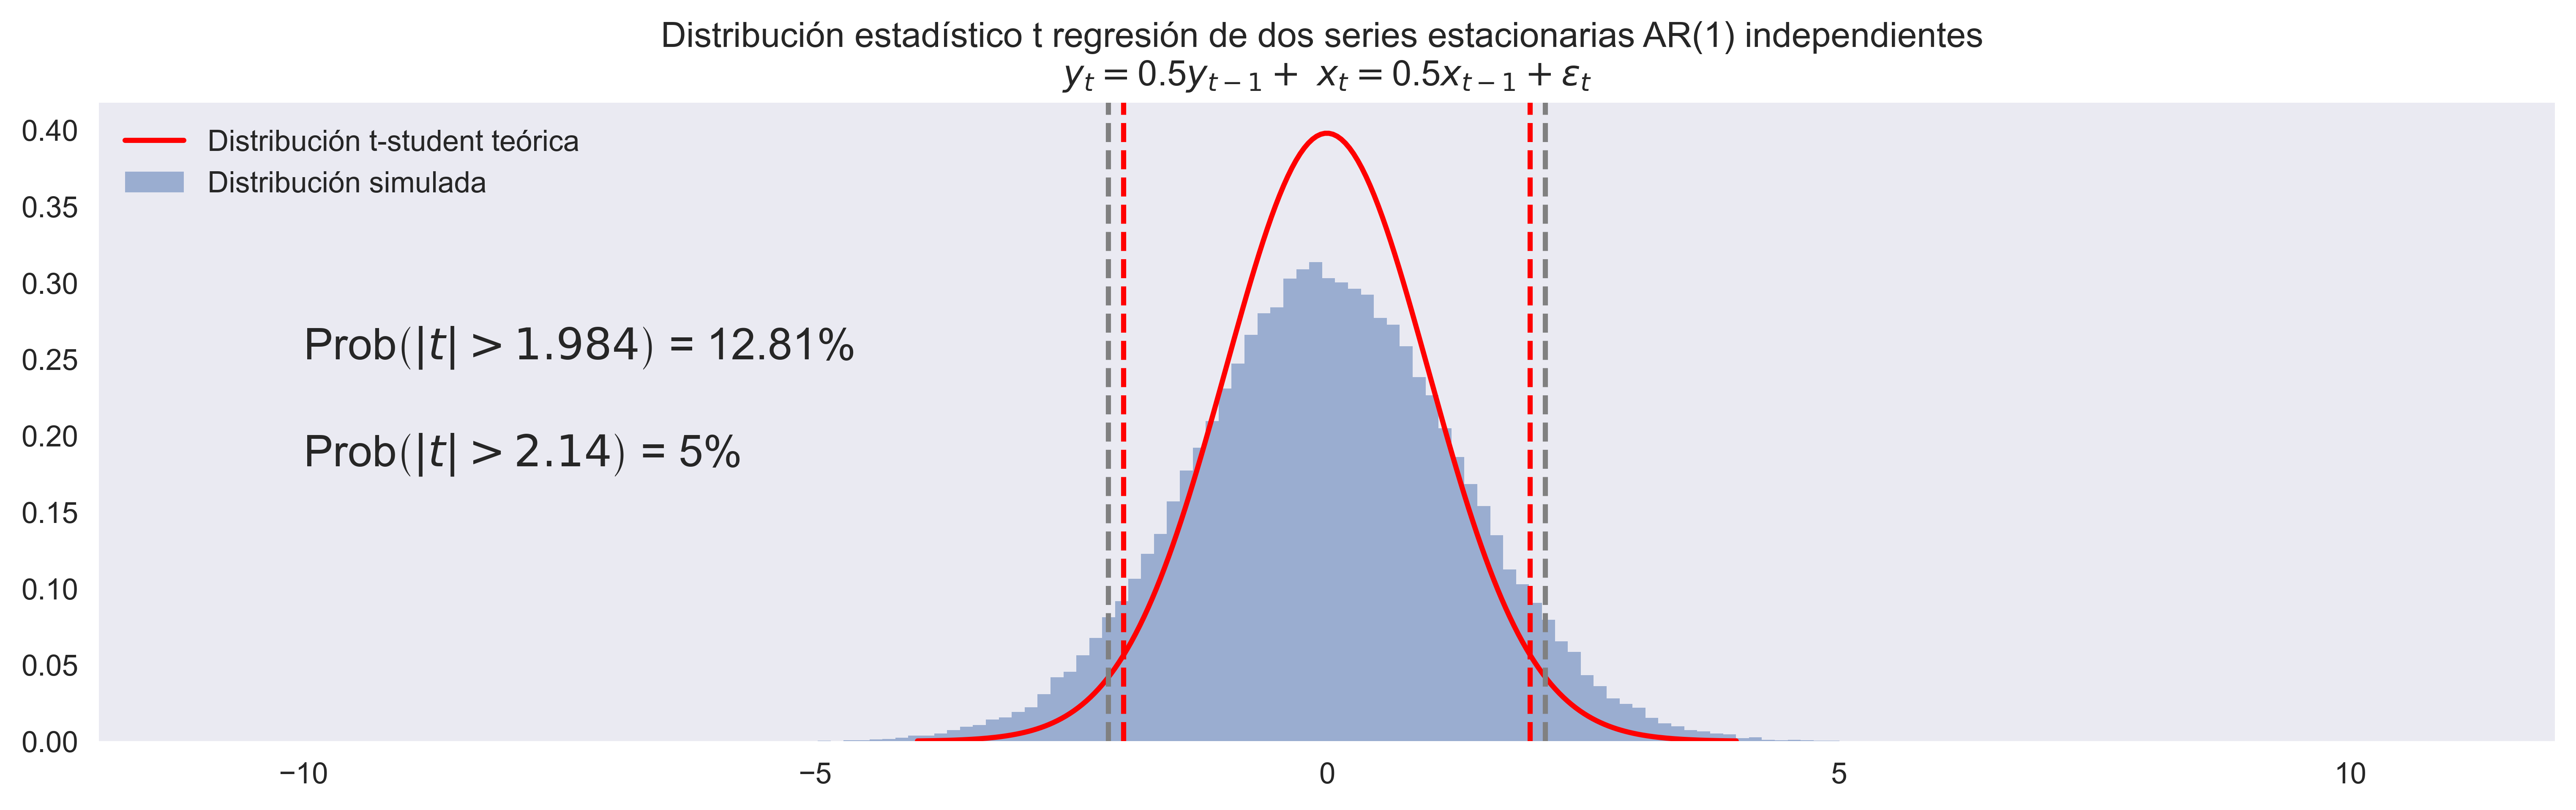

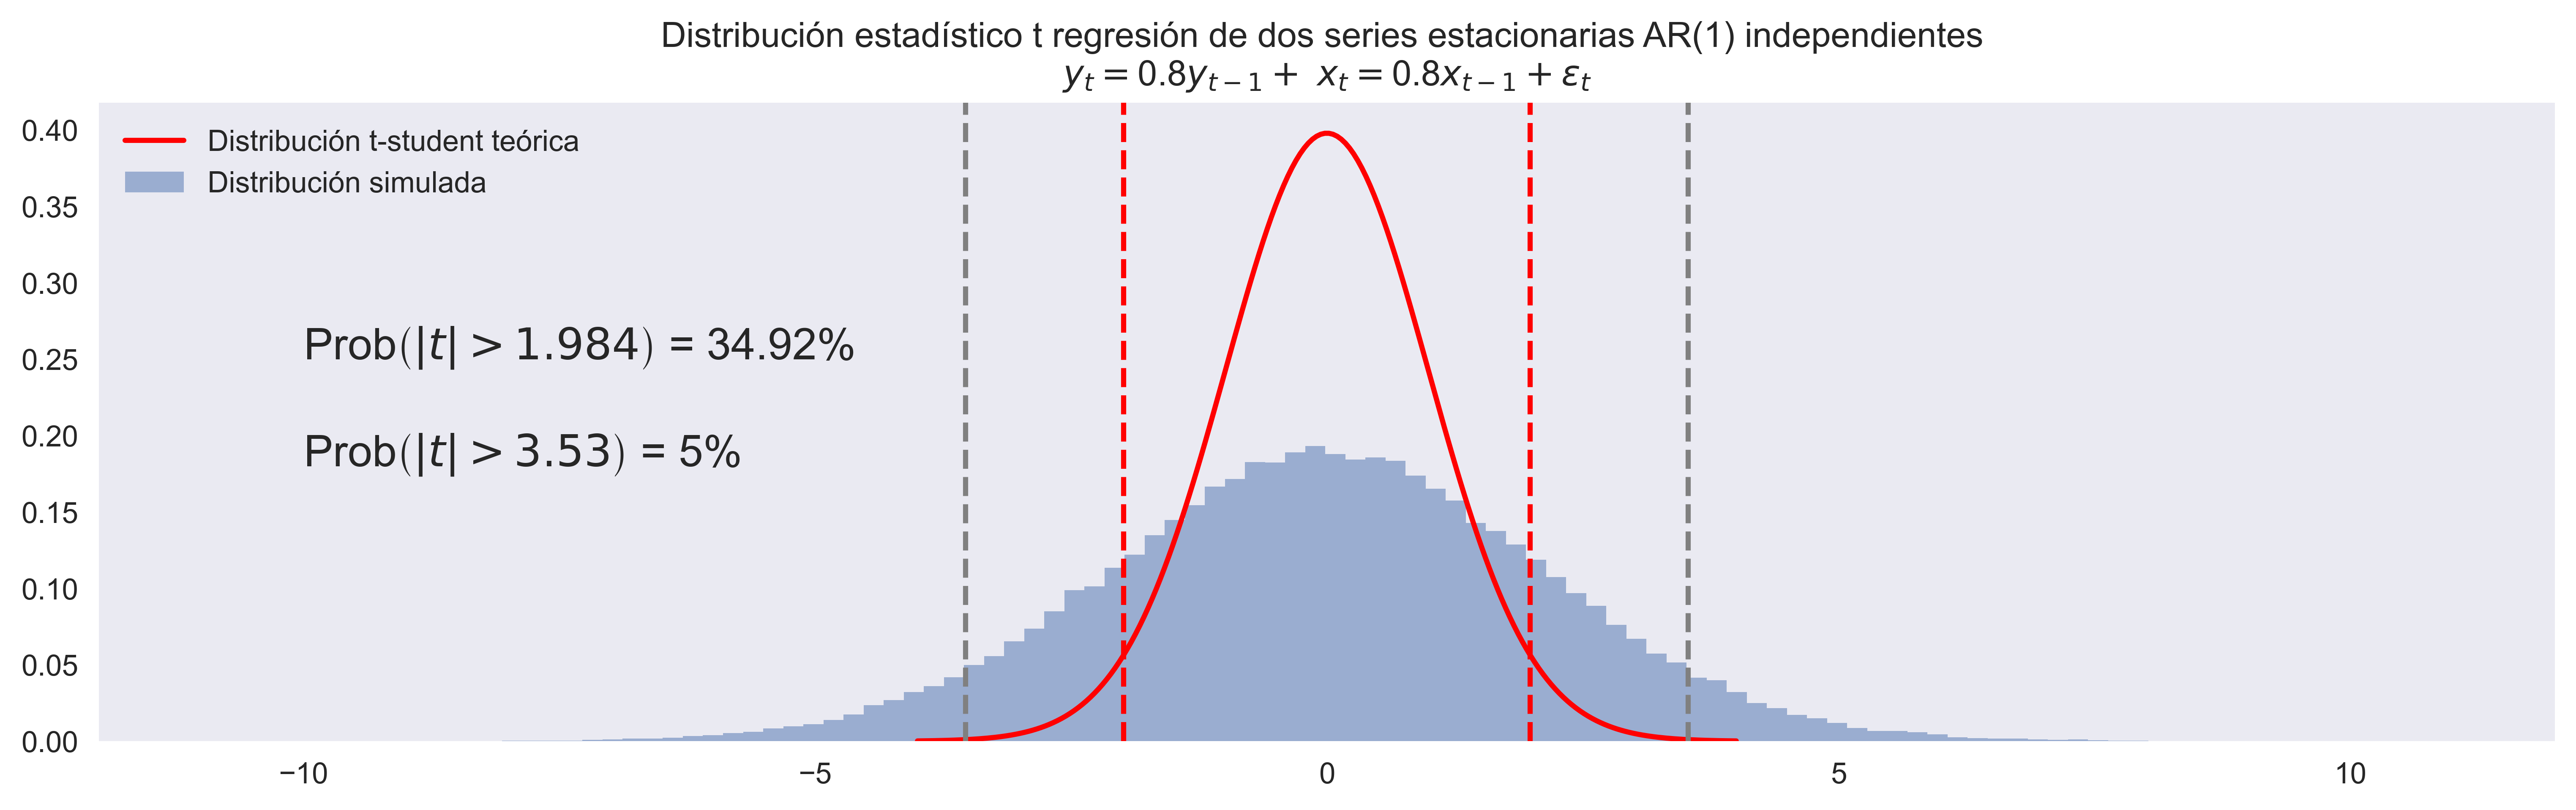

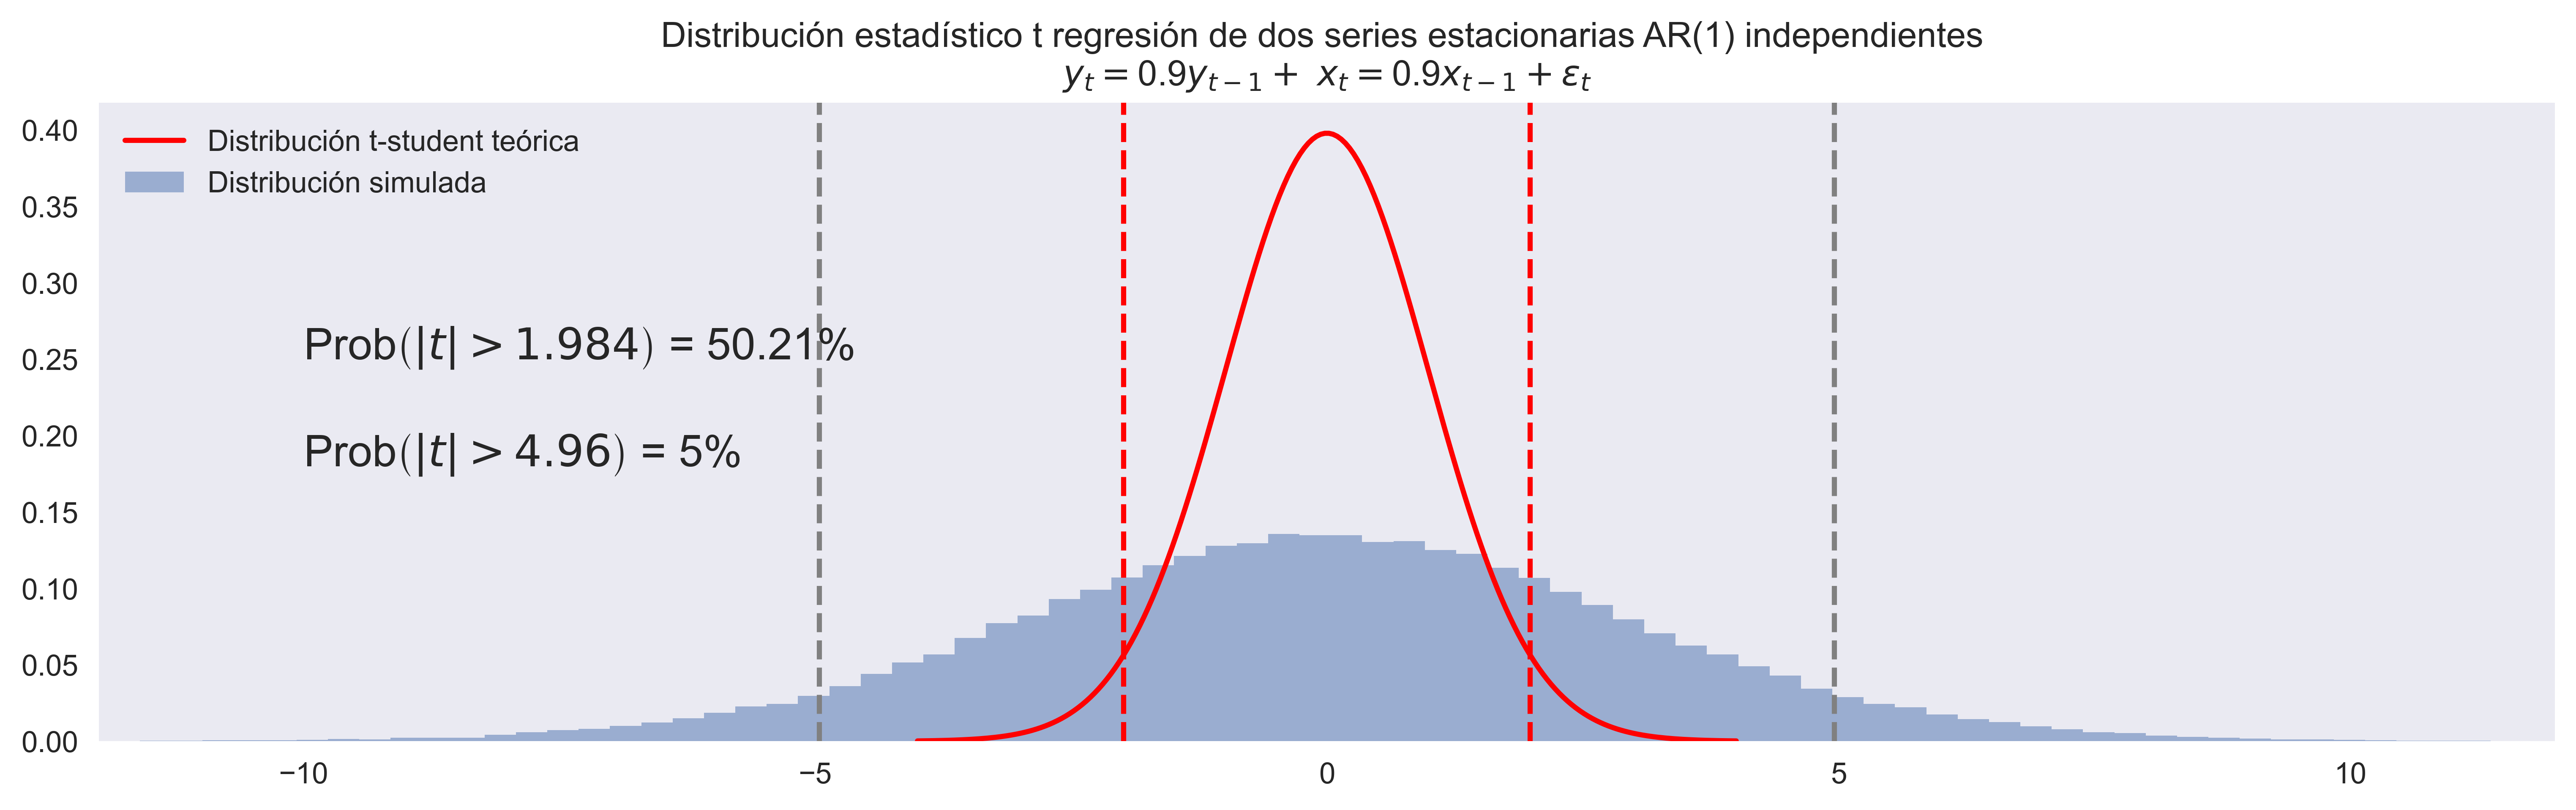

In [26]:
#Crear histogramas
histo("0.3", tvalues3)
histo("0.5", tvalues5)
histo("0.8", tvalues8)
histo("0.9", tvalues9)

Se realizaron varios experimentos de Monte Carlo para la distribución del estadístico t de la regresión de una serie estacionaria $y_t$ contra otra $x_t$, ambas independientes entre sí, variando la constante $\phi$ que acompaña el termino autorregresivo. A mayor $\phi$, el error tipo I aumenta, es decir, aumenta la probabilidad de rechazar que el coeficiente sea insignificante cuando sí lo es. Para el caso particular de $\phi = 0.8$, aproximadamente 35% de las veces se rechaza que el coeficiente es insignificante cuando este en realidad sí lo es, con un valor crítico de 1.984 (valor de significancia del 5% de la distribución t-student teórica). Por tanto, sí puede existir relaciones espurias entre series estacionarias.

### Referencias

Schwert, G. W. (1989). Tests for unit roots: A Monte Carlo
   investigation. Journal of Business and Economic Statistics, 7 (2):
   147-159.